# 0 Begin Imports

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set width of window to preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# 1 Import wrangled data

In [2]:
#year = "2019"                                                     #choose year to get data from
#split = "summer"                                                  #choose split to get data from(spring, summer, worlds)
#infile = r"C:\Users\Triplea657\000 MSCS-335 2020\Datasets\League_"#path
#inf = "-Wrangled.csv"                                             #file to read
#filein = infile+year+"\\"+year+'-'+split+'-'+inf
#data = pd.read_csv(filein,low_memory=False)
#data.head(10)

#changed for submission version
data = pd.read_csv("Datasets/League_2019/2019-summer-Wrangled.csv", index_col=0, low_memory=False)
data.head()

league_CBLoL  league_LCK  league_LCS  league_LEC  league_LMS  gamelength  \
0           0.0         0.0         1.0         0.0         0.0   35.500000   
1           0.0         0.0         1.0         0.0         0.0   35.500000   
2           0.0         0.0         1.0         0.0         0.0   29.700000   
3           0.0         0.0         1.0         0.0         0.0   29.700000   
4           0.0         0.0         1.0         0.0         0.0   31.983333   

   result     k     d     a   fb       kpm      okpm      ckpm   fd  \
0     1.0  21.0  14.0  52.0  0.0  0.591549  0.394366  0.985915  0.0   
1     0.0  14.0  21.0  32.0  1.0  0.394366  0.591549  0.985915  1.0   
2     1.0  11.0   4.0  25.0  1.0  0.370370  0.134680  0.505051  1.0   
3     0.0   4.0  11.0  10.0  0.0  0.134680  0.370370  0.505051  0.0   
4     1.0  12.0   3.0  26.0  1.0  0.375195  0.093799  0.468994  0.0   

      fdtime  teamdragkills  oppdragkills  elementals  oppelementals  \
0  12.556633            2.0           2.0         2.0            2.0   
1  12.556633            2.0           2.0         2.0            2.0   
2  12.306967            2.0           1.0         2.0            1.0   
3  12.306967            1.0           2.0         1.0            2.0   
4  10.158933            3.0           1.0         3.0            1.0   

   firedrakes  waterdrakes  earthdrakes  airdrakes  elders  oppelders  herald  \
0         2.0          0.0          0.0        0.0     0.0        0.0     1.0   
1         1.0          0.0          0.0        1.0     0.0        0.0     0.0   
2         0.0          0.0          1.0        1.0     0.0        0.0     0.0   
3         0.0          1.0          0.0        0.0     0.0        0.0     1.0   
4         1.0          0.0          0.0        2.0     0.0        0.0     0.0   

   heraldtime   ft     fttime  firstmidouter  firsttothreetowers  \
0   13.369417  1.0  15.162683            1.0                 0.0   
1   13.369417  0.0  15.162683            0.0                 1.0   
2   12.377433  1.0  12.791600            1.0                 1.0   
3   12.377433  0.0  12.791600            0.0                 0.0   
4   12.242783  0.0  14.386333            1.0                 1.0   

   teambaronkills  oppbaronkills  dmgtochamps  dmgtochampsperminute  wards  \
0             1.0            0.0      70545.0           1987.183099  109.0   
1             0.0            1.0      71736.0           2020.732394  108.0   
2             1.0            0.0      51538.0           1735.286195   96.0   
3             0.0            1.0      38185.0           1285.690236   93.0   
4             1.0            0.0      49421.0           1545.211047  143.0   

        wpm  wardkills      wcpm  totalgold    earnedgpm  goldspent      gspd  \
0  3.070423       51.0  1.436620    69022.0  1293.464789    65108.0  0.110966   
1  3.042254       37.0  1.042254    61541.0  1082.732394    58263.0 -0.110966   
2  3.232323       44.0  1.481481    59081.0  1330.861953    50910.0  0.135867   
3  3.131313       41.0  1.380471    45794.0   883.488215    44433.0 -0.135867   
4  4.471079       44.0  1.375717    61326.0  1262.351225    54340.0  0.158169   

   monsterkillsownjungle  monsterkillsenemyjungle       cspm  goldat10  \
0                  151.0                     24.0  31.802817   16118.0   
1                  155.0                      4.0  32.985915   15436.0   
2                  102.0                     56.0  35.656566   16270.0   
3                   82.0                      0.0  33.265993   14985.0   
4                  128.0                     18.0  34.299114   16157.0   

   oppgoldat10  gdat10  goldat15  oppgoldat15  gdat15   xpat10  oppxpat10  \
0      15436.0   682.0   24287.0      23616.0   671.0  19260.0    18621.0   
1      16118.0  -682.0   23616.0      24287.0  -671.0  18621.0    19260.0   
2      14985.0  1285.0   27399.0      23026.0  4373.0  19015.0    18226.0   
3      16270.0 -1285.0   23026.0      27399.0 -4373.0  18226.0 

In [3]:
inddatatxt = open("Data explanation - team stats.txt")
print(inddatatxt.read())
print('\n\n\n----\n\n\n')
var = []
for i in data:
    var.append(i)
print('variables used verification:  ' +str(var))
for i, v in enumerate(var):
    print(i, v)

Data Project Data Categories

All data pulled from OraclesElixir.com.
OraclesElixir is a third party company that gathers data directly from Riot Games, the developers of League of Legends who captured the data directly from the games played.


League of Legends is a real-time strategy game in which 5 players each control a unique character with various abilities.
The goal of the game is to destroy the enemy team's nexus in the center of their base. 
Killing enemy champions, minion and monsters gives you gold and experience and if you are considered "behind" your opponents you gain extra gold and experience upon champion kill or assist.
There are a number of "neutral objectives" on the map which can be killed by either team. The team that lands the death blow on these neutral objectives gains various permanent bonus 
strengths based on the objective killed. These objectives are Rift Herald, Dragons, and Baron.
The map has several towers which defend their allied champions and must be d

# Begin looking at data

In [4]:
graphidx = [6,7,8,9,10,12,16,17,30,33,34,38,45,51,60]
tograph = pd.DataFrame(data)
tograph1 = tograph.iloc[:,graphidx]

print("I thought these variables would have interesting correlations so I wanted to graph these first:")
print(tograph1.columns)

tograph1

I thought these variables would have interesting correlations so I wanted to graph these first:
Index(['result', 'k', 'd', 'a', 'fb', 'okpm', 'teamdragkills', 'oppdragkills',
       'firstmidouter', 'oppbaronkills', 'dmgtochamps', 'wardkills',
       'monsterkillsenemyjungle', 'oppgoldat15', 'oppcsat15'],
      dtype='object')


result     k     d     a   fb      okpm  teamdragkills  oppdragkills  \
0        1.0  21.0  14.0  52.0  0.0  0.394366            2.0           2.0   
1        0.0  14.0  21.0  32.0  1.0  0.591549            2.0           2.0   
2        1.0  11.0   4.0  25.0  1.0  0.134680            2.0           1.0   
3        0.0   4.0  11.0  10.0  0.0  0.370370            1.0           2.0   
4        1.0  12.0   3.0  26.0  1.0  0.093799            3.0           1.0   
...      ...   ...   ...   ...  ...       ...            ...           ...   
1439     1.0  23.0  16.0  44.0  0.0  0.535714            1.0           2.0   
1440     1.0  17.0   9.0  46.0  0.0  0.362660            2.0           0.0   
1441     0.0   9.0  17.0  24.0  1.0  0.685024            0.0           2.0   
1442     1.0  17.0   9.0  46.0  0.0  0.362660            2.0           0.0   
1443     0.0   9.0  17.0  24.0  1.0  0.685024            0.0           2.0   

      firstmidouter  oppbaronkills  dmgtochamps  wardkills  \
0               1.0            0.0      70545.0       51.0   
1               0.0            1.0      71736.0       37.0   
2               1.0            0.0      51538.0       44.0   
3               0.0            1.0      38185.0       41.0   
4               1.0            0.0      49421.0       44.0   
...             ...            ...          ...        ...   
1439            1.0            0.0      60794.0       33.0   
1440            1.0            0.0      47449.0       19.0   
1441            0.0            1.0      38810.0       28.0   
1442            1.0            0.0      47449.0       19.0   
1443            0.0            1.0      38810.0       28.0   

      monsterkillsenemyjungle  oppgoldat15  oppcsat15  
0                        24.0      23616.0      535.0  
1                         4.0      24287.0      548.0  
2                        56.0      23026.0      506.0  
3                         0.0      27399.0      509.0  
4                        18.0      22782.0      470.0  
...                       ...          ...        ...  
1439                     20.0      27108.0      517.0  
1440                     20.0      24773.0      477.0  
1441                      5.0      26695.0      491.0  
1442                     20.0      24773.0      477.0  
1443                      5.0      26695.0      491.0  

[1444 rows x 15 columns]

I thought that these would be interesting to plot against each other in particular


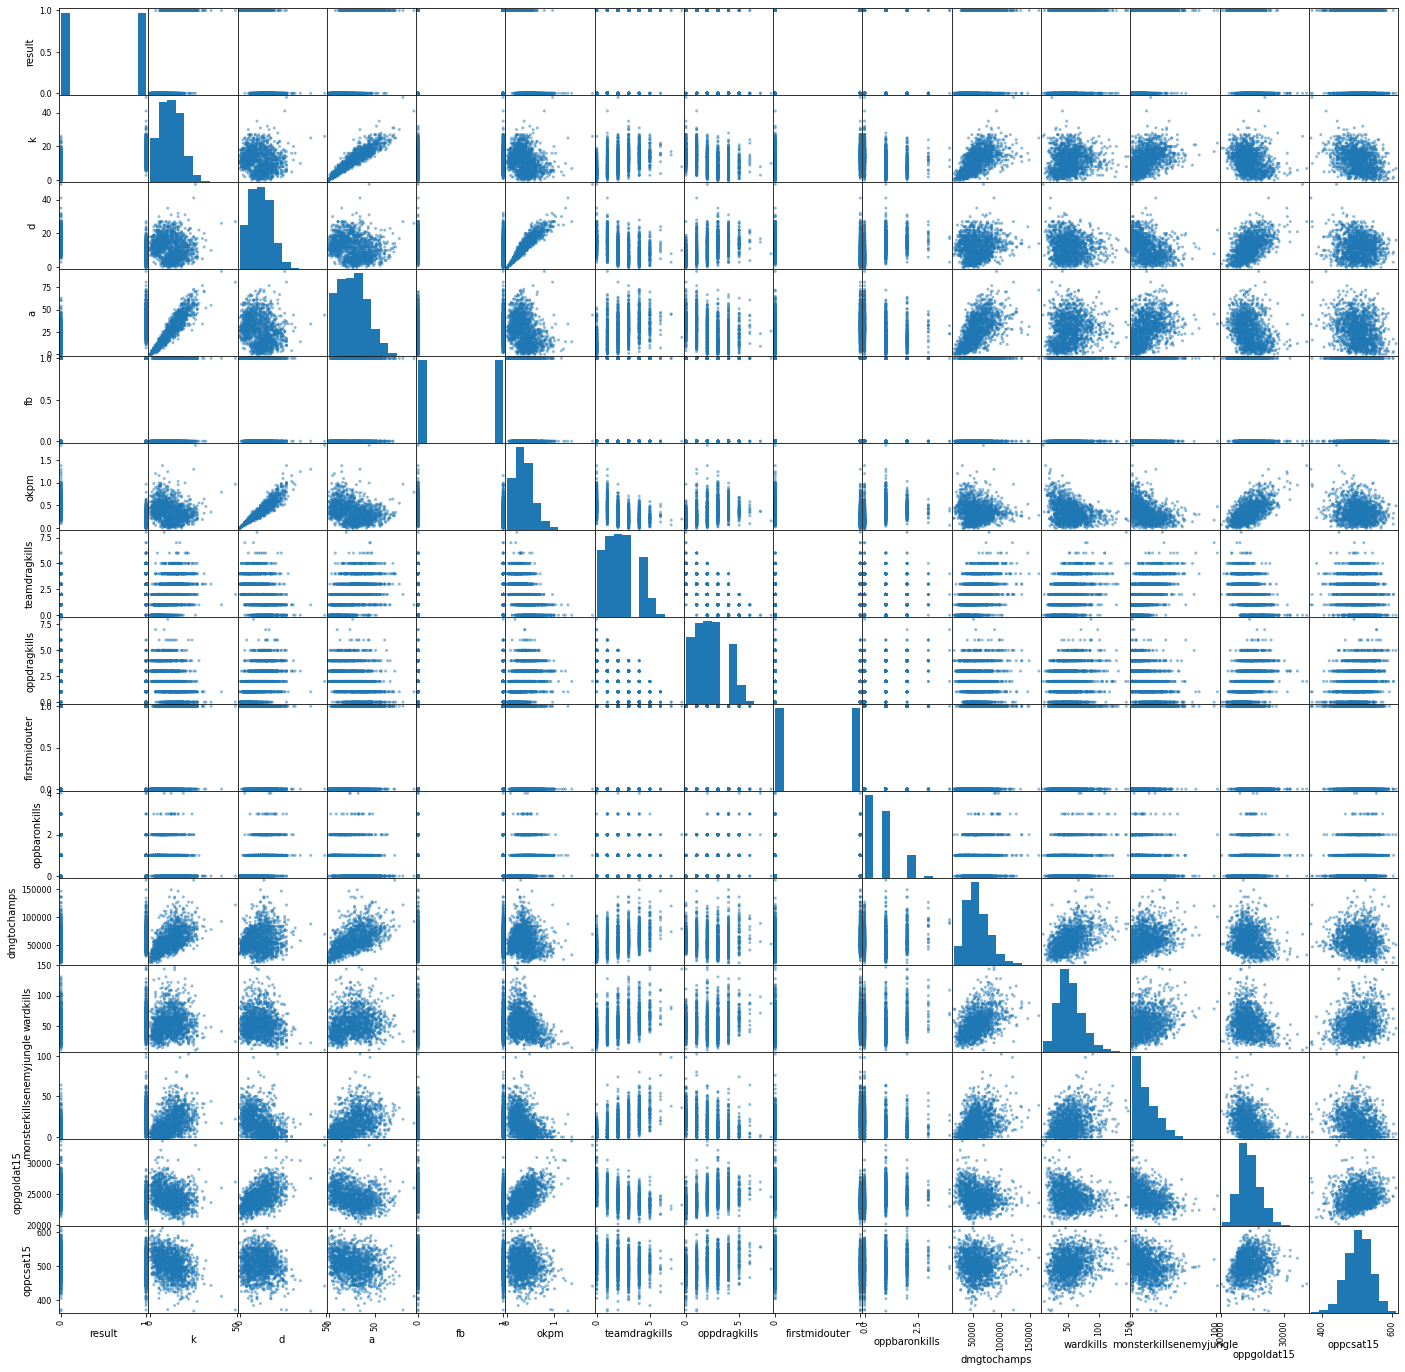

In [5]:
print("I thought that these would be interesting to plot against each other in particular")
pd.plotting.scatter_matrix(tograph1,figsize=(24,24))
plt.show()

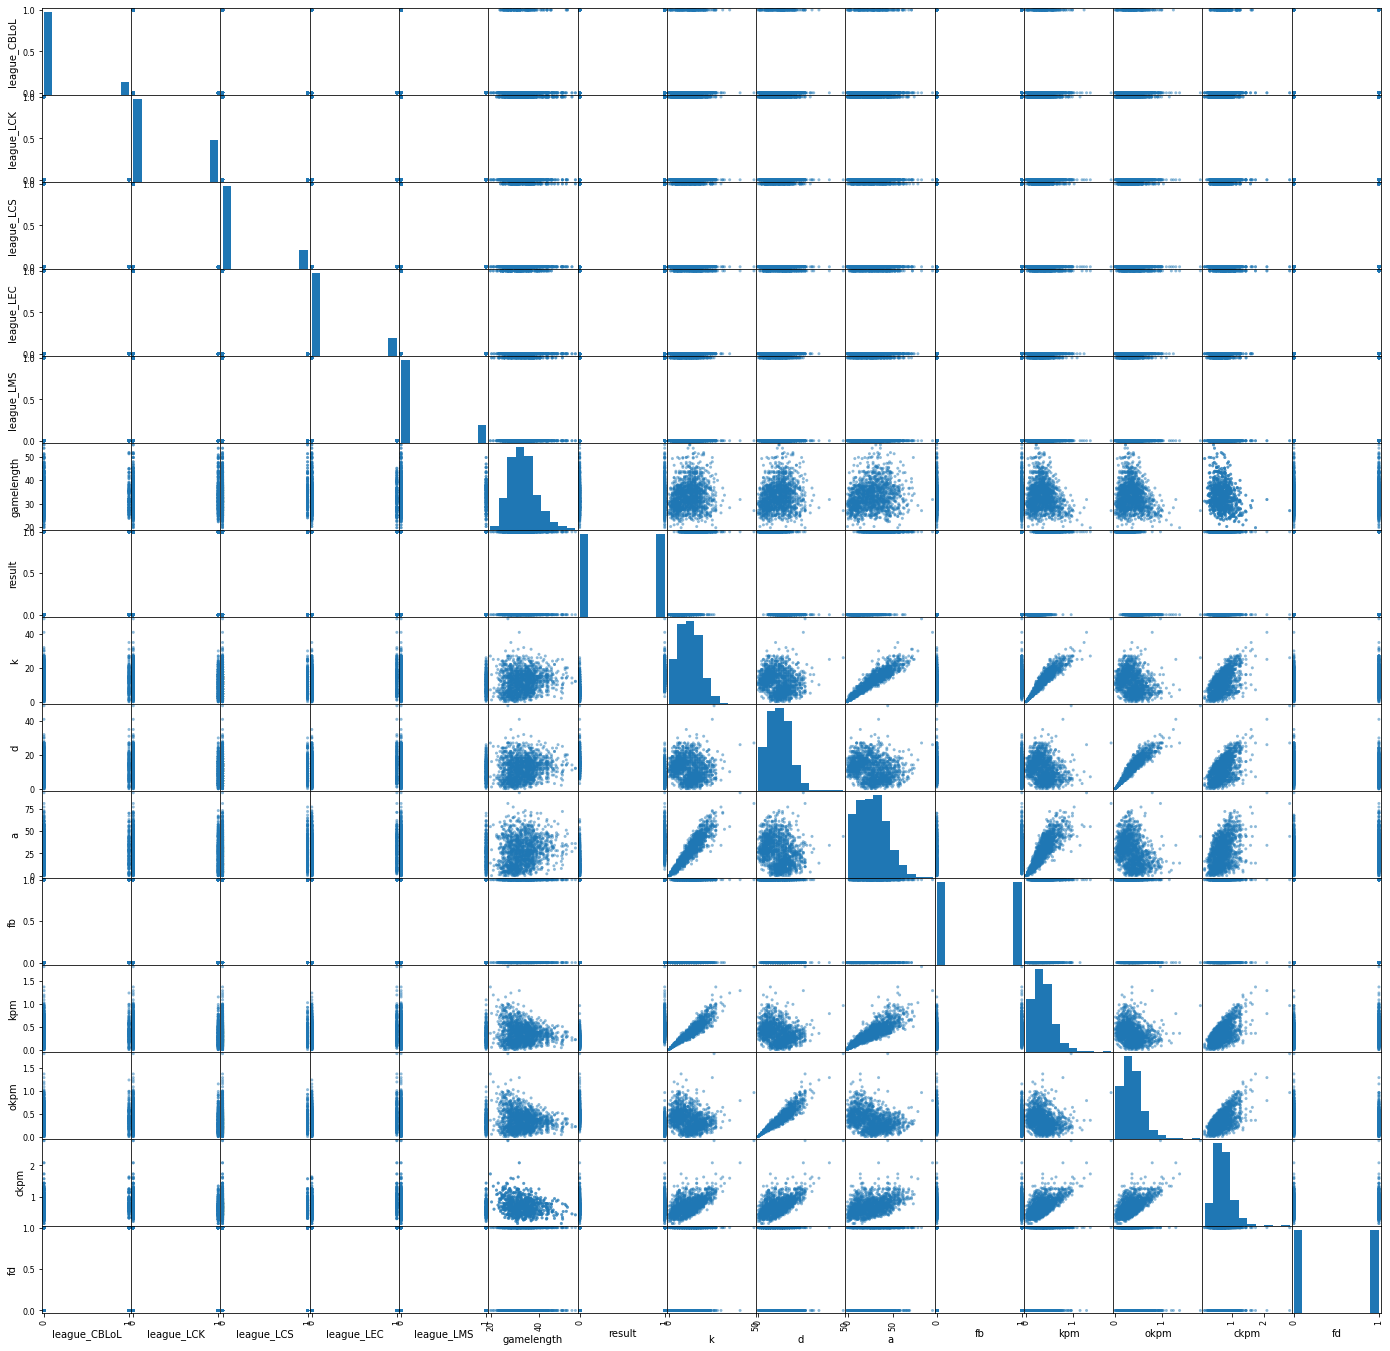

In [6]:
graph = tograph.iloc[:,:15]
pd.plotting.scatter_matrix(graph,figsize=(24,24))
plt.show()

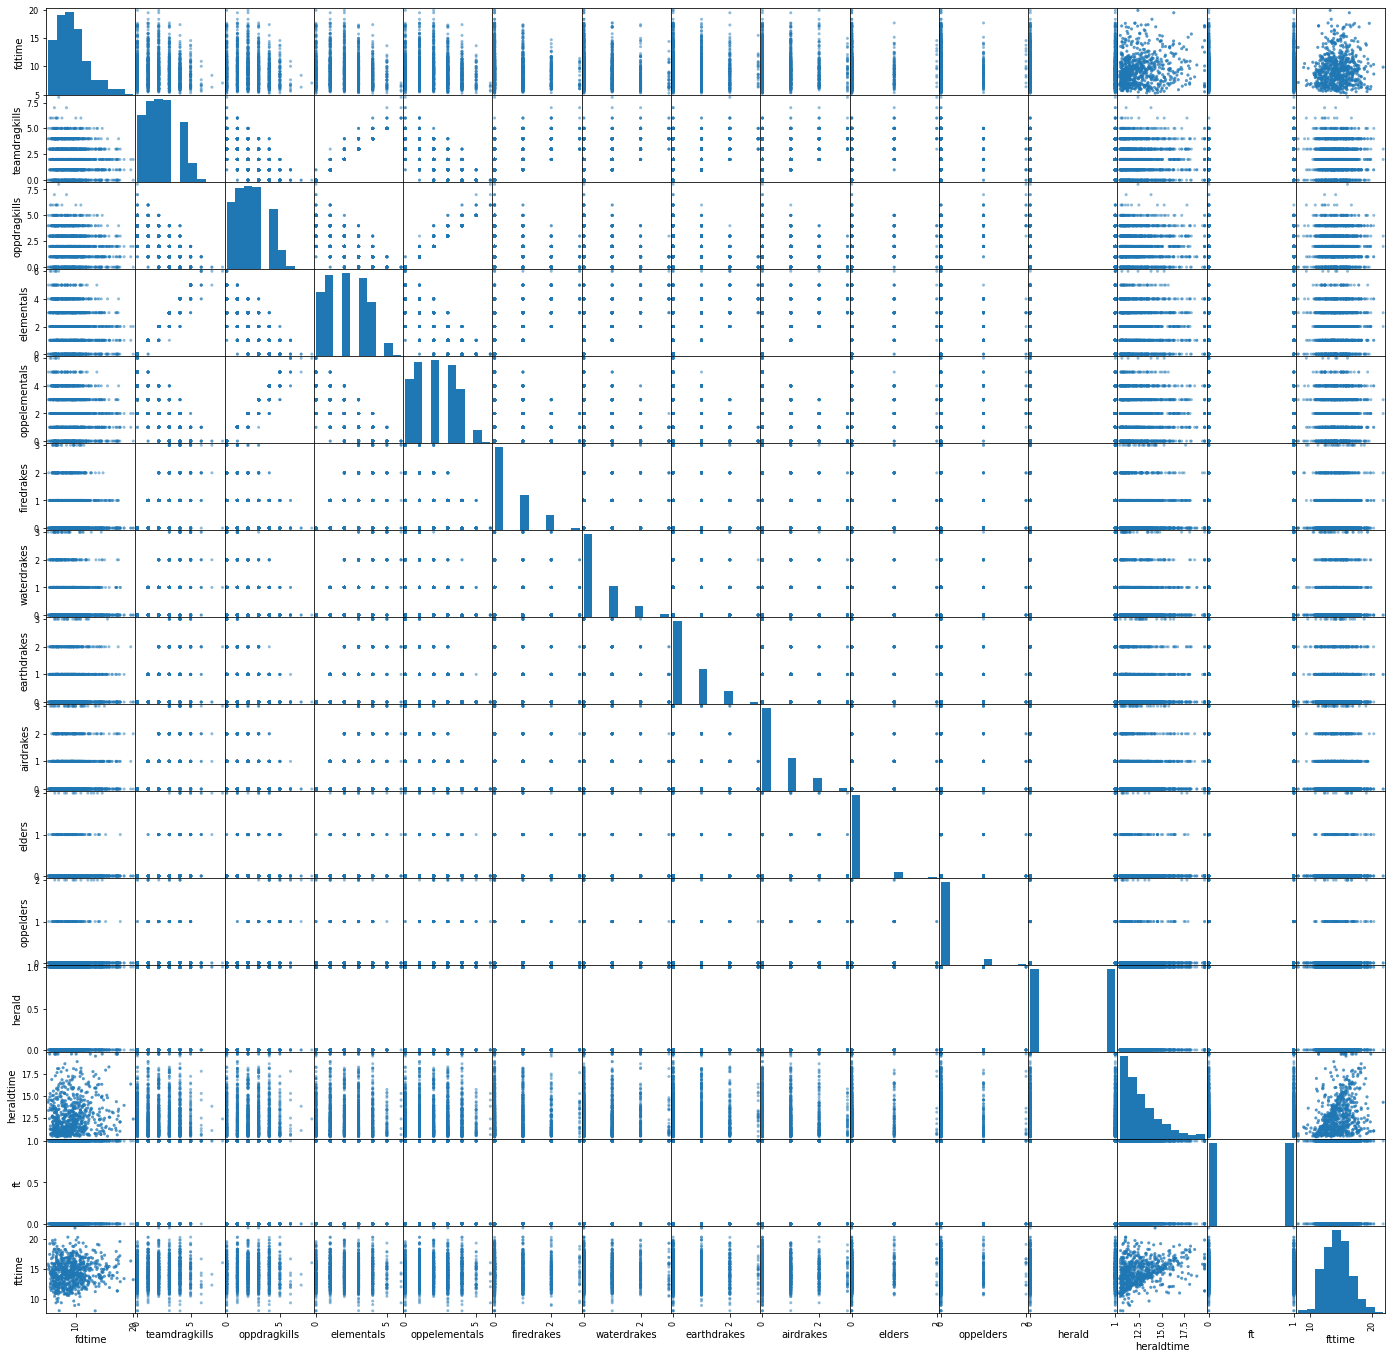

In [7]:
graph = tograph.iloc[:,15:30]
pd.plotting.scatter_matrix(graph,figsize=(24,24))
plt.show()

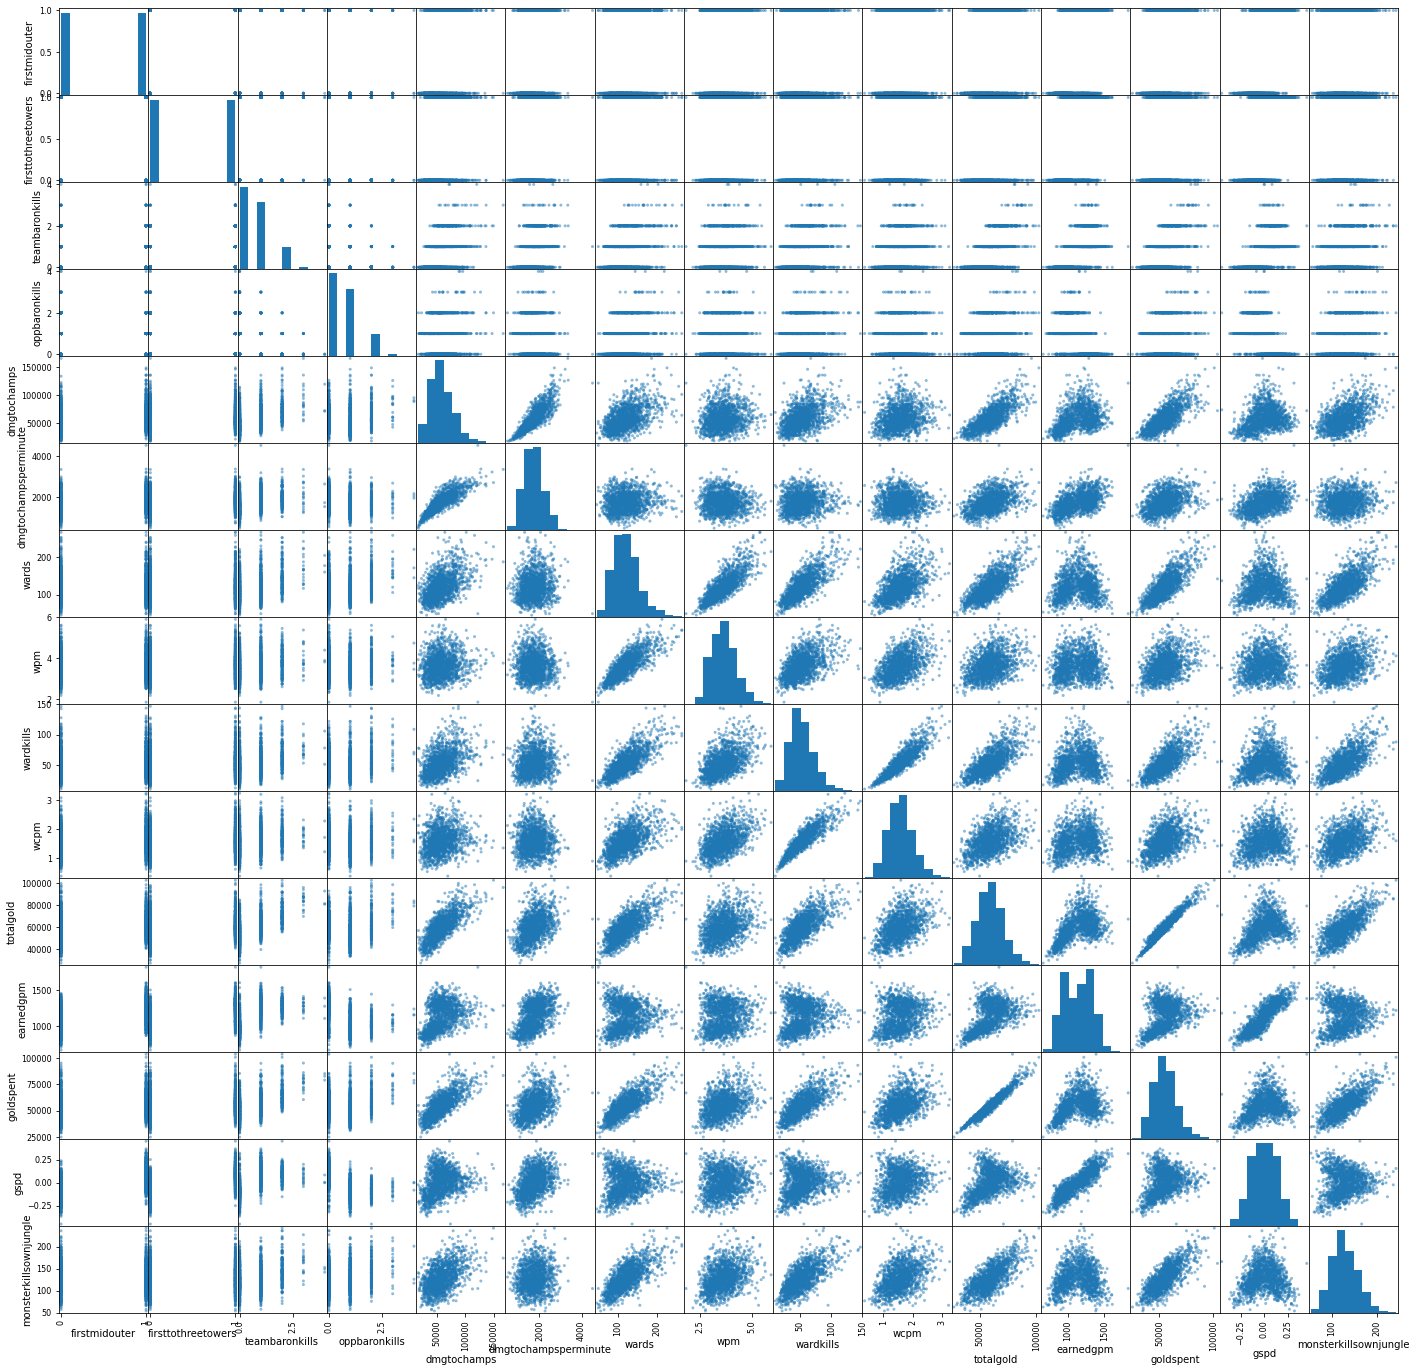

In [8]:
graph = tograph.iloc[:,30:45]
pd.plotting.scatter_matrix(graph,figsize=(24,24))
plt.show()

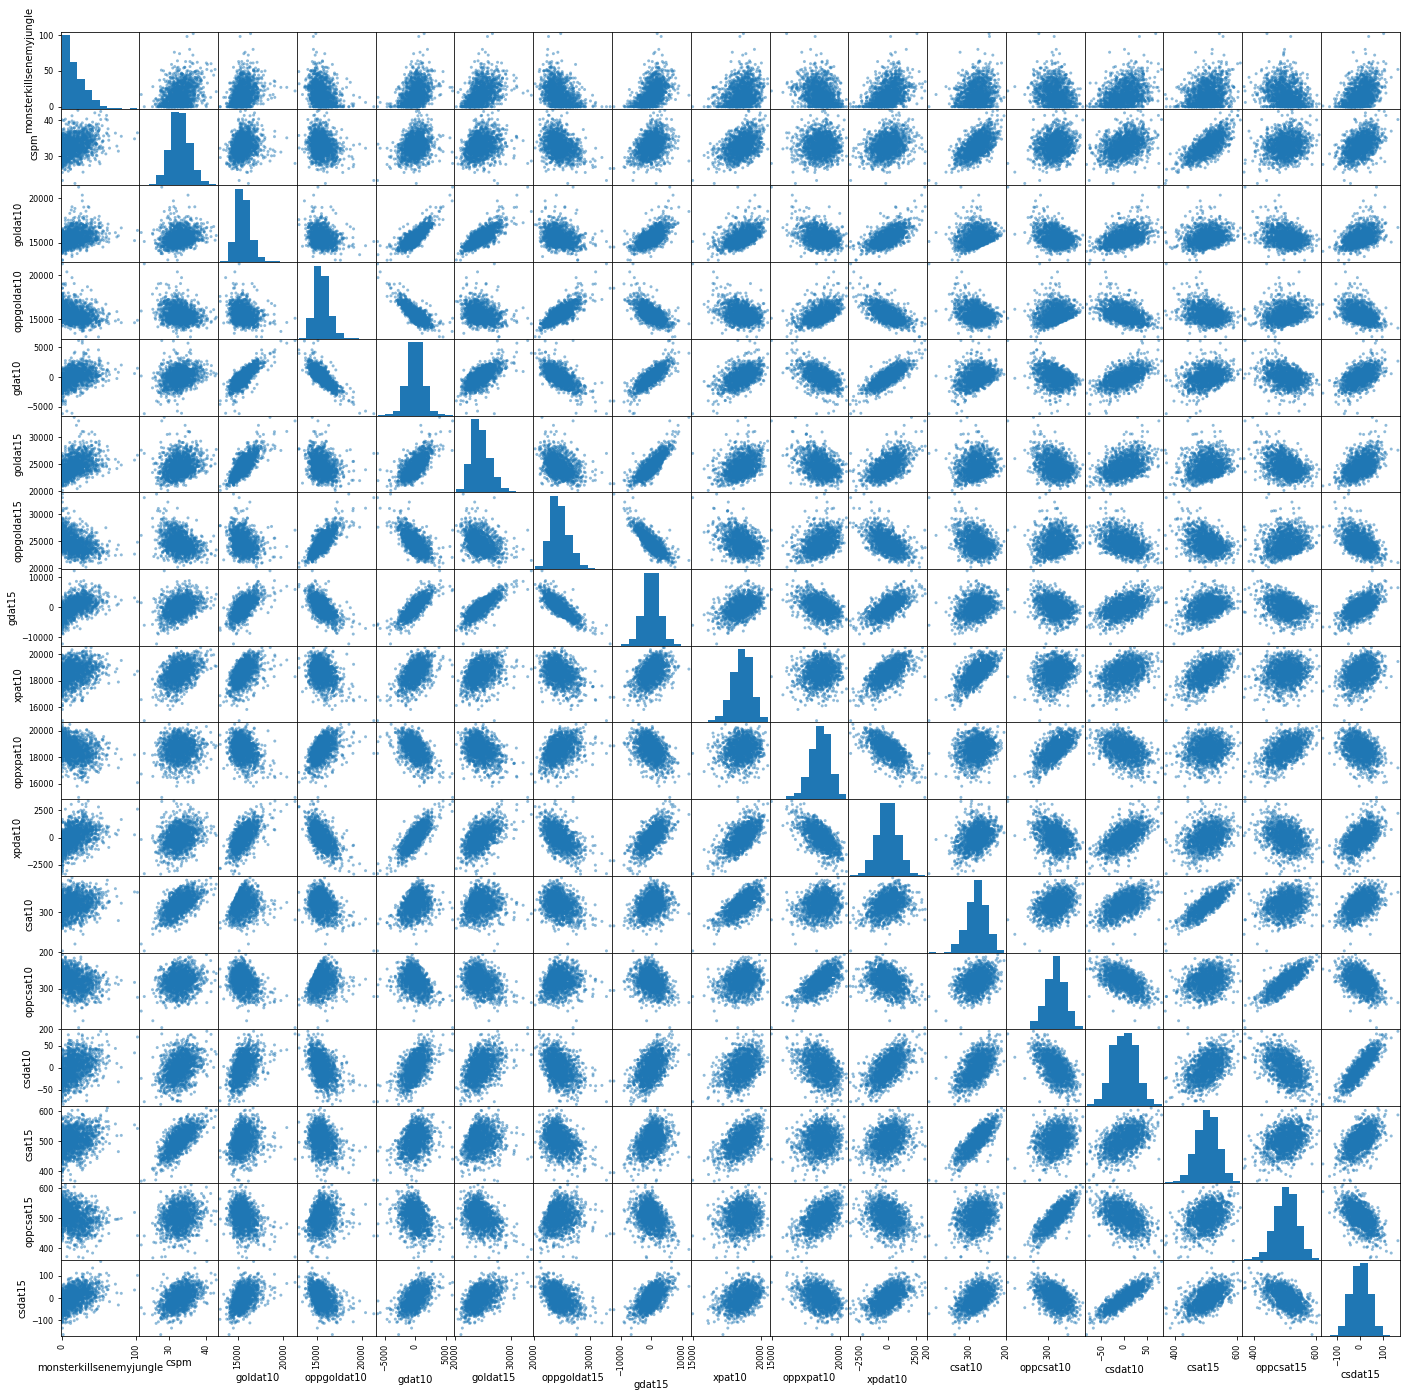

In [9]:
graph = tograph.iloc[:,45:]
pd.plotting.scatter_matrix(graph,figsize=(24,24))
plt.show()

In [46]:
# Code for the following graphs based on https://www.kaggle.com/immodal/predicting-player-placement
resultTitles = ["Loss","Win"]
resultIndexs = [   0.0,  1.0]
colors       = [   "r",  "g"]
resultDict   = dict()
for i, ind in enumerate(resultIndexs):
    resultDict[ind] = resultTitles[i]
resultLabeled = data["result"].replace(resultDict)

def violin_plot(y, title, w, h, ymin=0):
    plt.figure(figsize=(w,h))
    ax = sns.violinplot(x=resultLabeled,y=y,palette=colors,order=resultTitles)
    ax.set(xlabel='Game Result')
    ax.set_ylim(ymin,)
    plt.title(title)
    plt.show()
    
def density_plot(x, title, w, h, ymin=0):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
    fig.set_size_inches(w,h)
    ax_box.set_xlim(ymin,x.max())
    ax_hist.set_xlim(ymin,x.max())
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box,left=True)
    ax_box.set_title(title)
    plt.show()
    
def plot(feature, fig_num, ymin=0, dataset=data):
    density_plot(dataset[feature],f"Figure {fig_num}: {feature} Distribution", 11,8,ymin)
    violin_plot(dataset[feature],f"Figure {fig_num}: {feature} by Result", 11,8,ymin)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


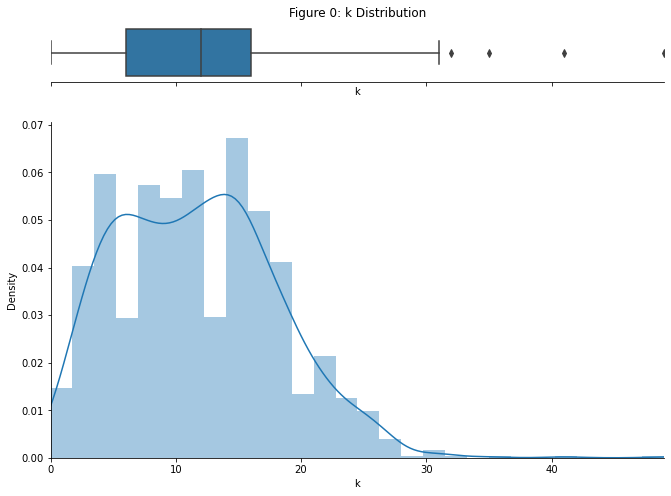

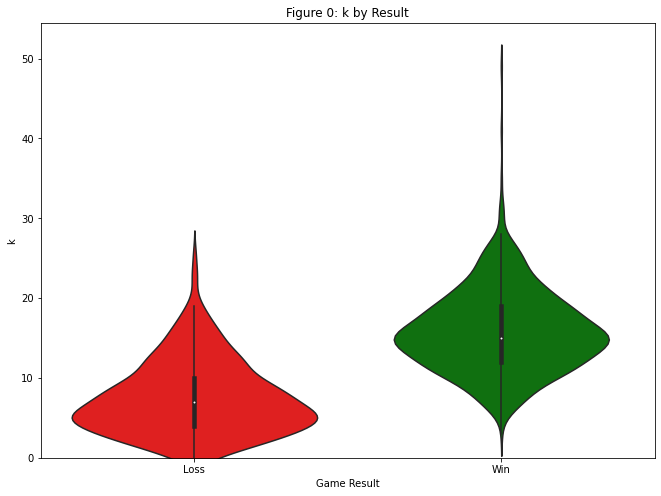

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


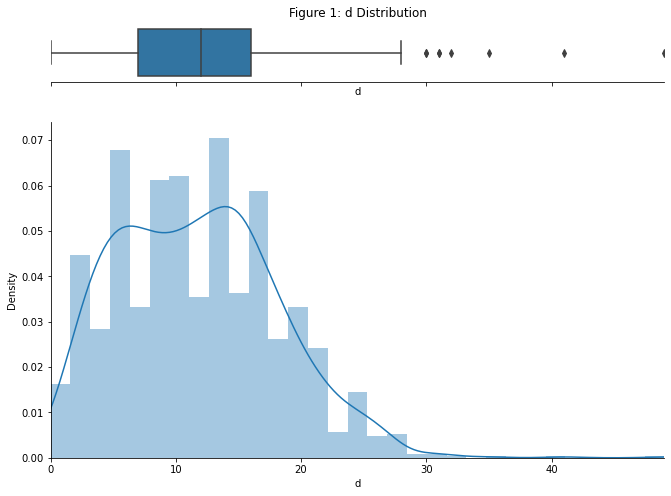

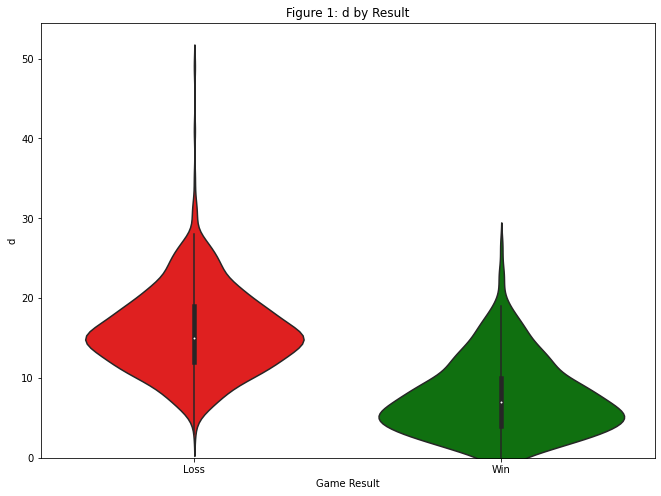

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


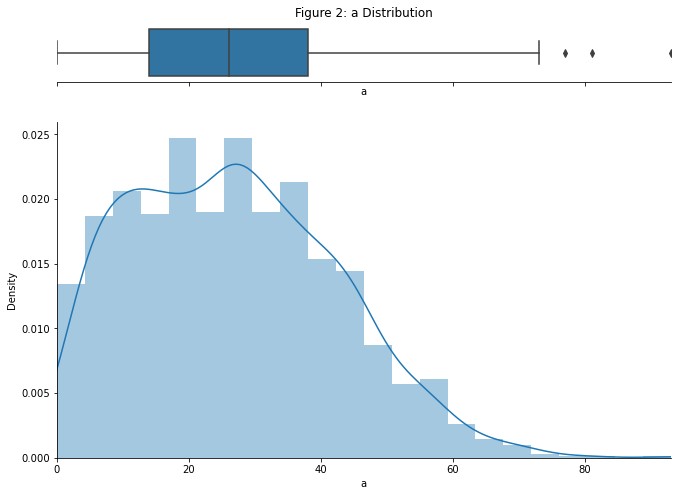

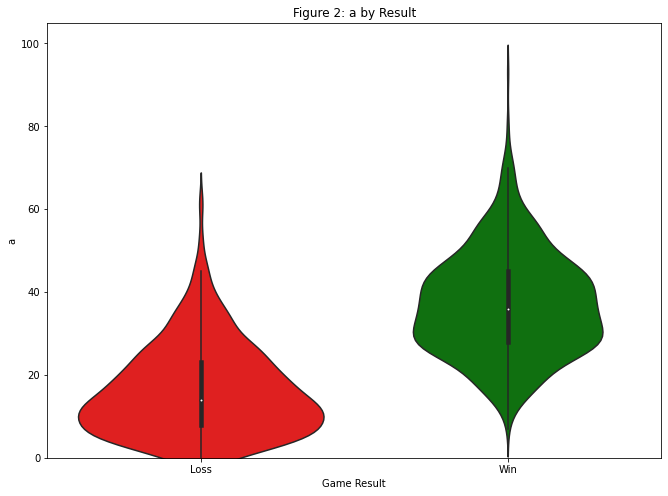

In [47]:
kda = ["k","d","a"]
for i,var in enumerate(kda):
    plot(var,i)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


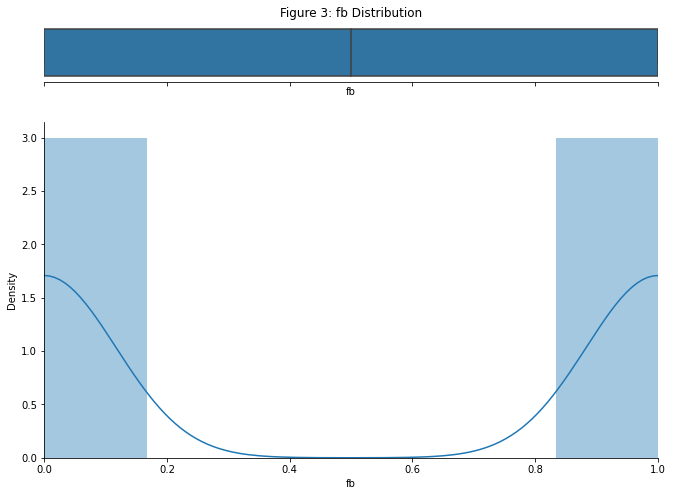

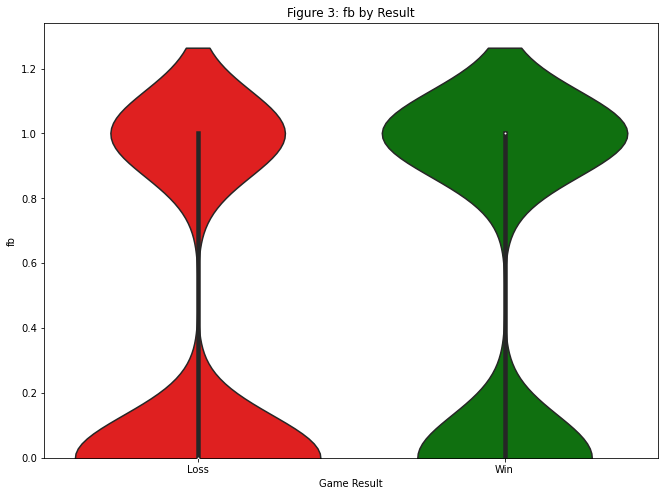

In [16]:
plot("fb",3)

##### it seems that which team gets the first kill of the game doesn't have much impact on the game

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


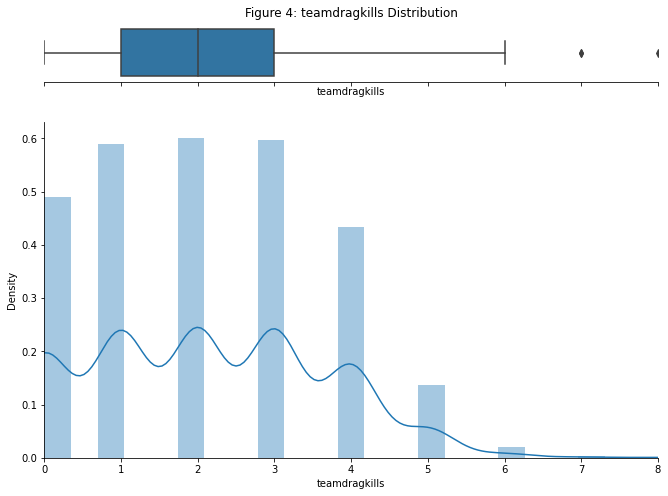

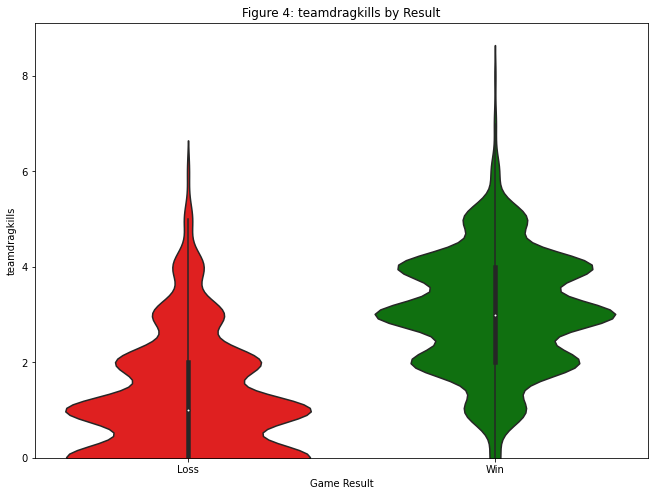

In [20]:
plot("teamdragkills",4)

##### It is pretty clear that more dragons indicated a notably greater chance of winning and winning teams almost always have many dragons

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


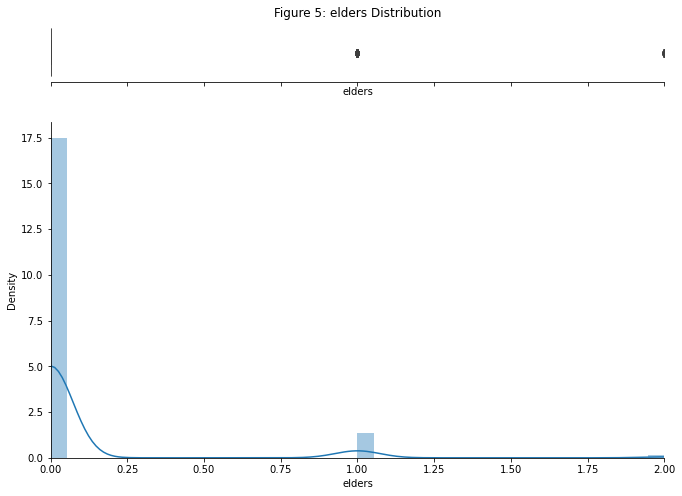

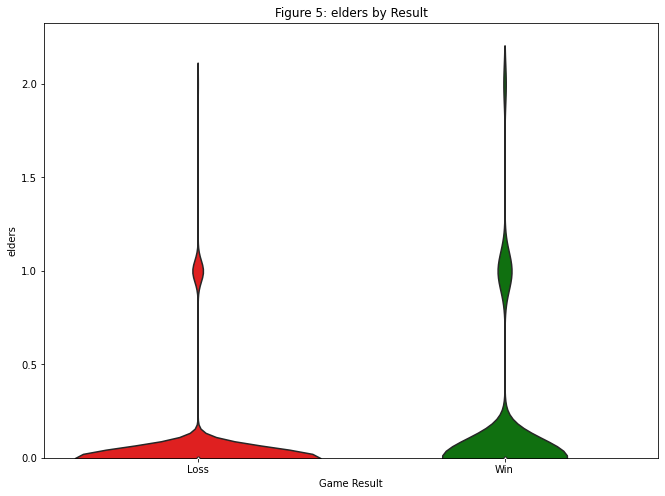

In [23]:
plot("elders",5)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


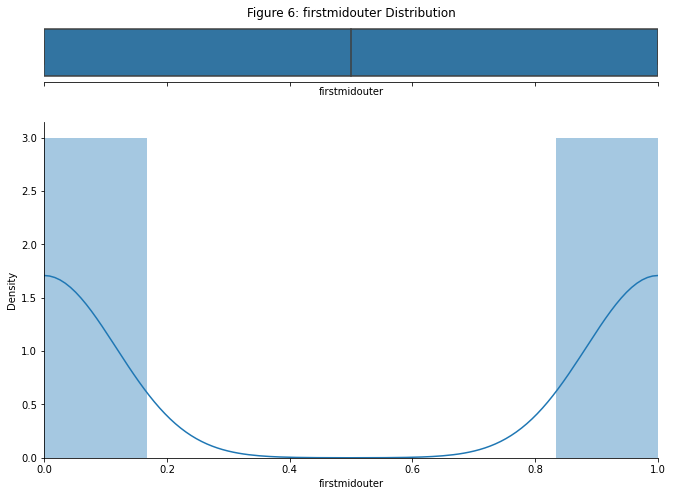

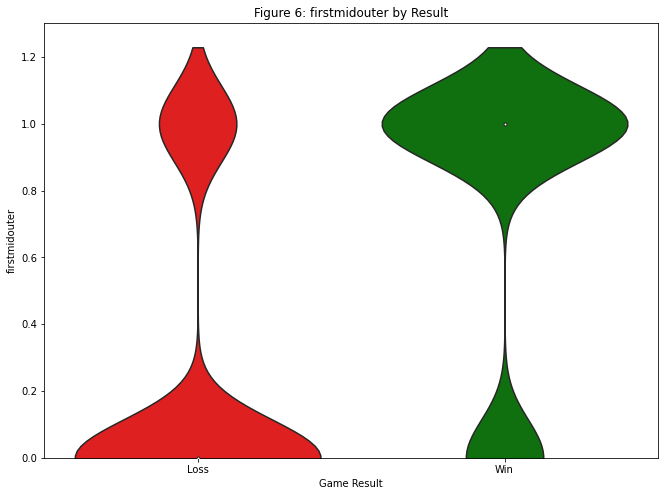

In [25]:
plot("firstmidouter",6)

##### Whichever team takes the first mid-outer turret is notably more likely to win, be that because it is hard to take unless far ahead or if because taking it is so beneficial to taking control of the map, it's hard to say.

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


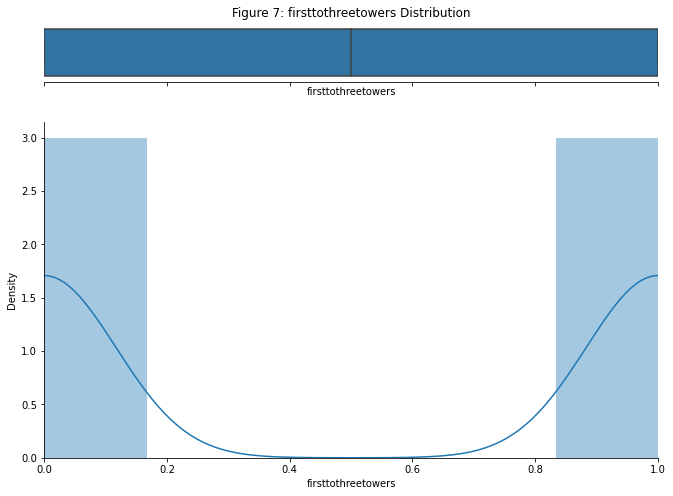

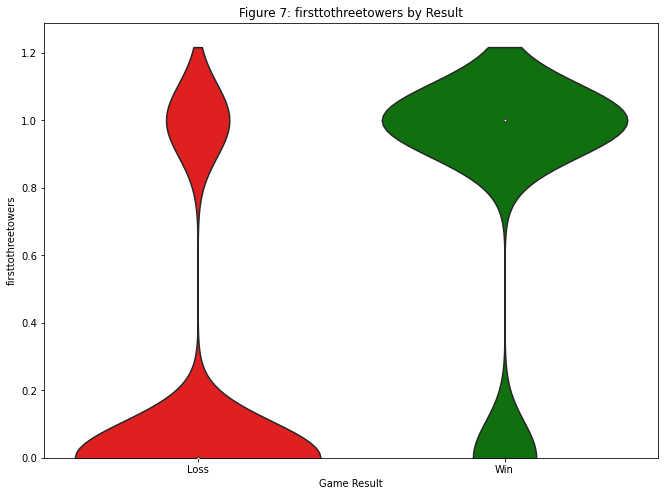

In [26]:
plot("firsttothreetowers",7)

##### Similar to first mid outer, the first team to take 3 towers is notably more likely to win

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


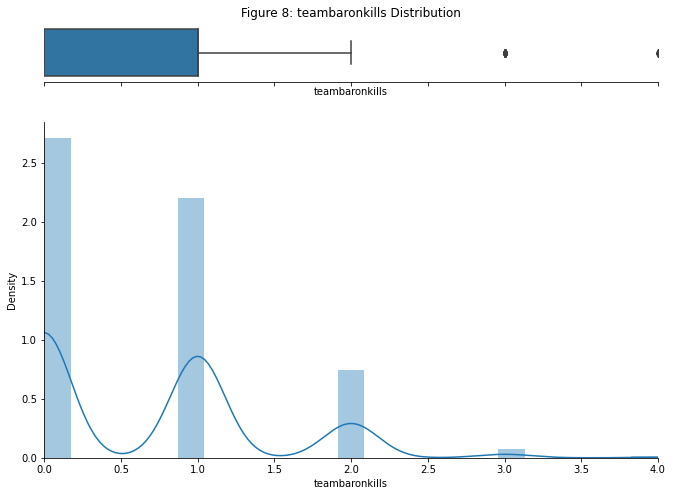

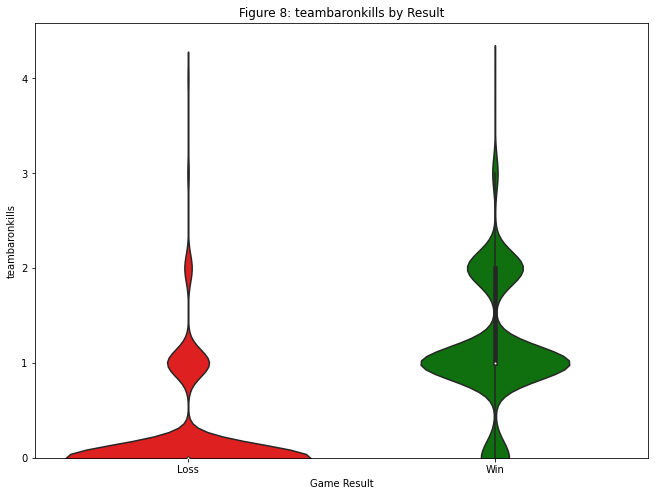

In [27]:
plot("teambaronkills",8)

##### Baron is a powerful objective and whichever team manages to take it seems to be at a very large advantage

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


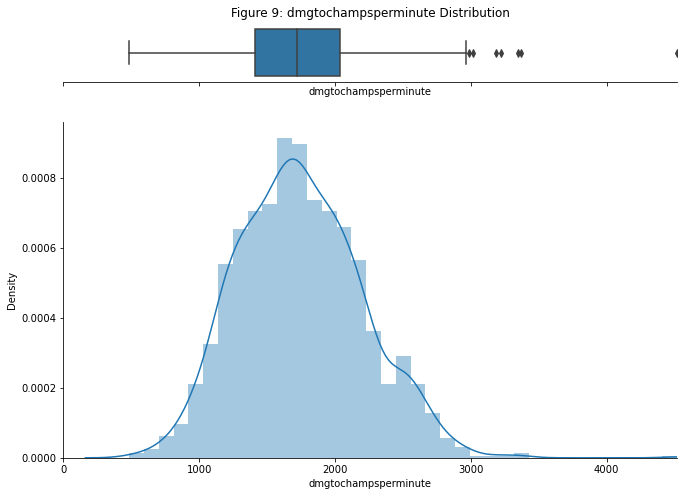

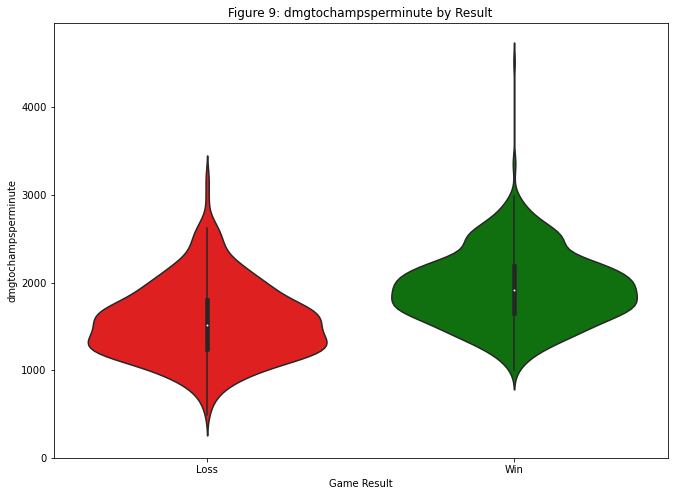

In [29]:
plot("dmgtochampsperminute",9)

##### While the winning team will likely have a higher damage per minute, there's enough overlap where it will be hard to be predictive on its own

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


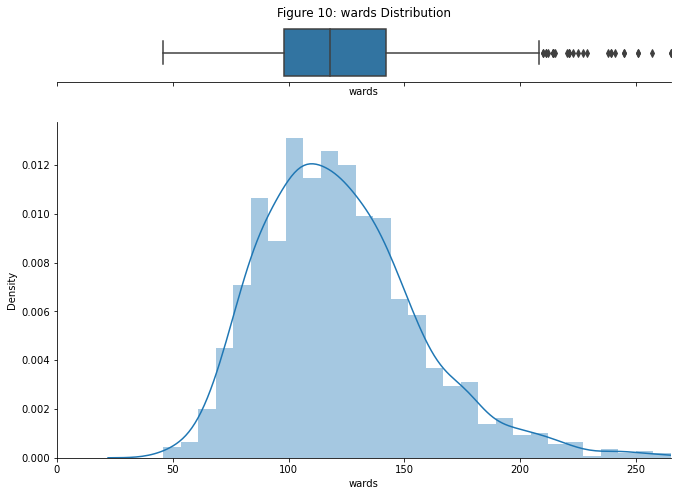

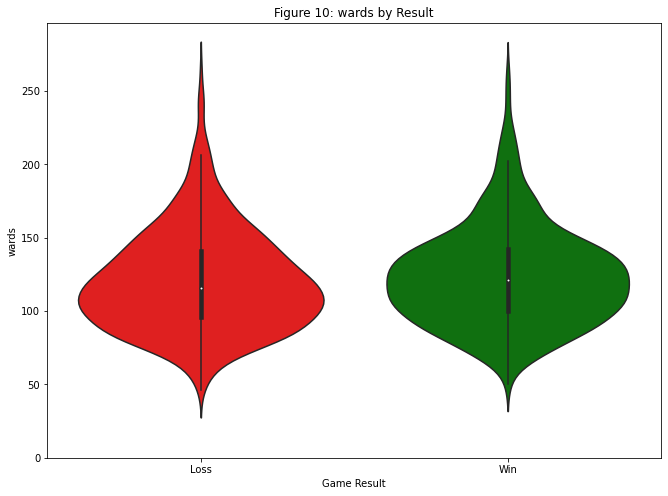

In [30]:
plot("wards",10)

##### While warding is incredibly important in regards to a team winning, at the professional level very few games are decided by how many wards are placed. If the data was about lower ELO ranges, then perhaps this would be meaningful

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


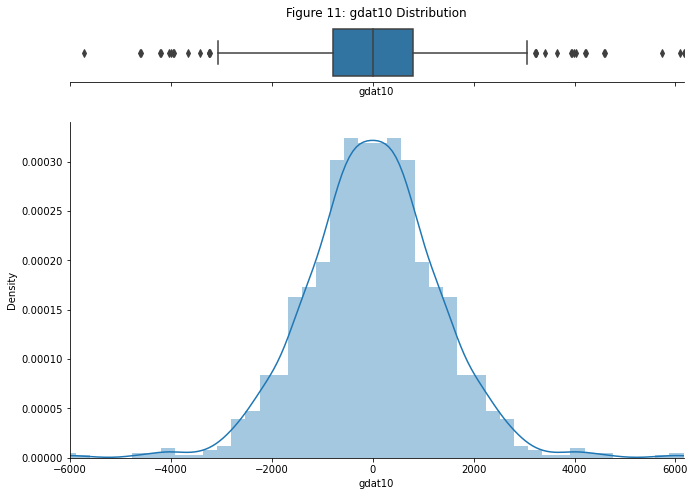

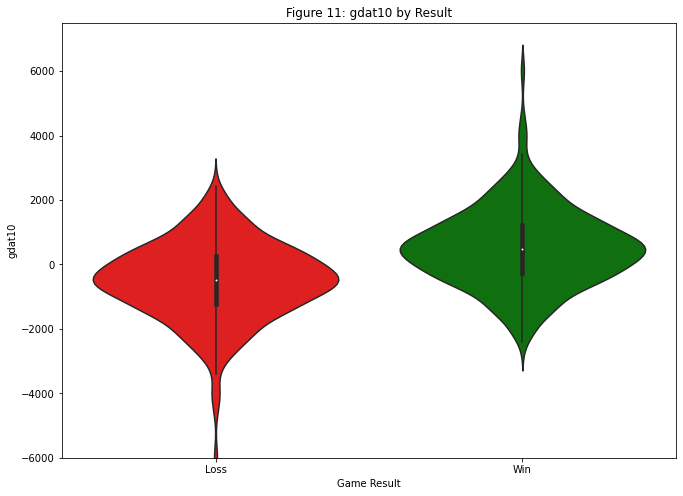

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


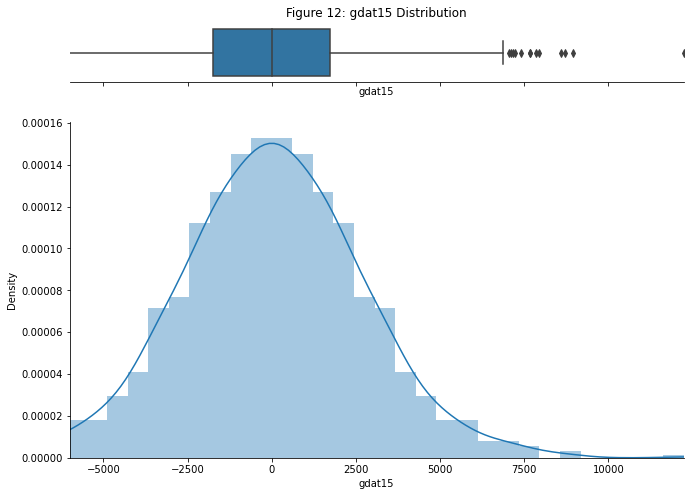

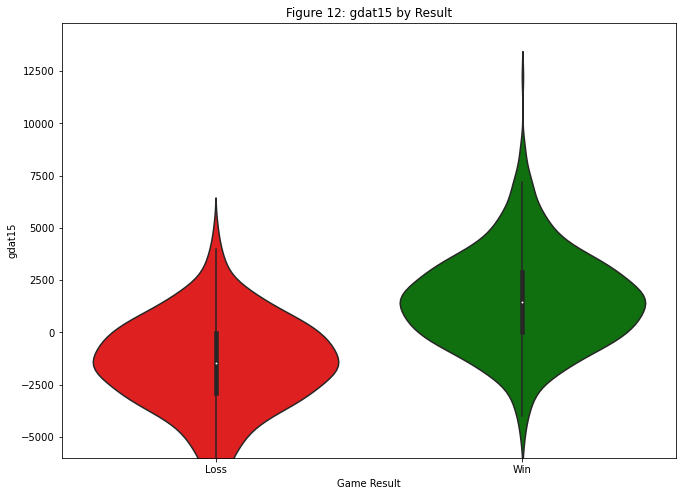

In [40]:
plot("gdat10",11,-6000)
plot("gdat15",12,-6000)

##### While gold difference at 10 minutes doesn't reflect which team won very well, by the 15 minute mark gold difference becomes much more predictive

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


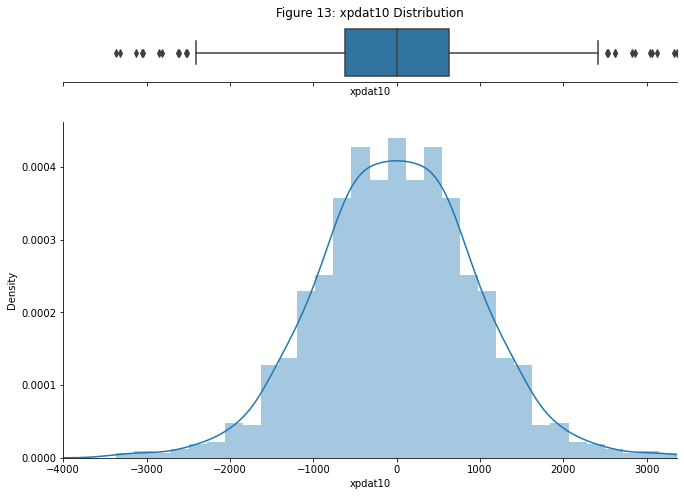

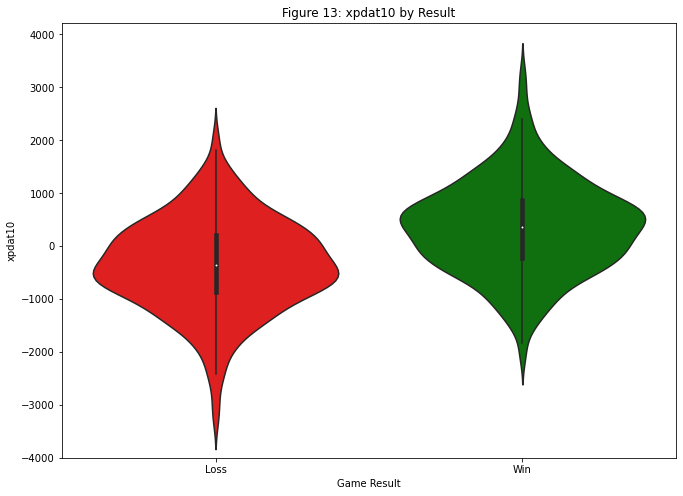

In [42]:
plot("xpdat10",13,-4000)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


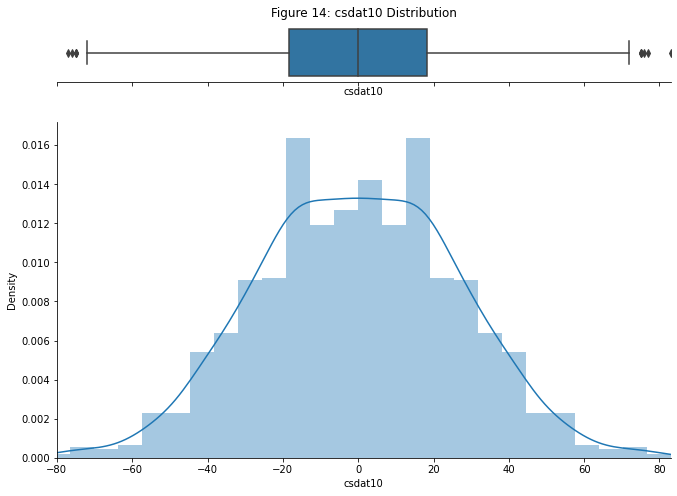

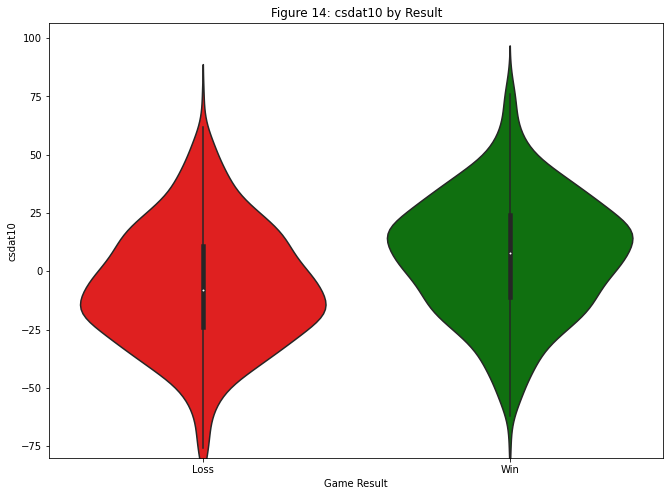

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


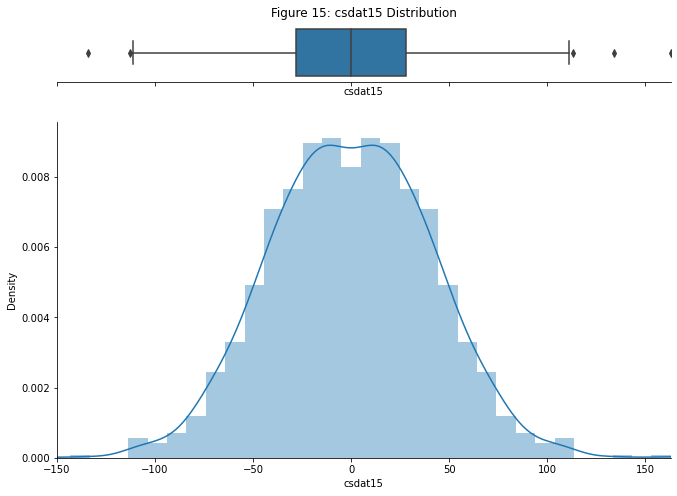

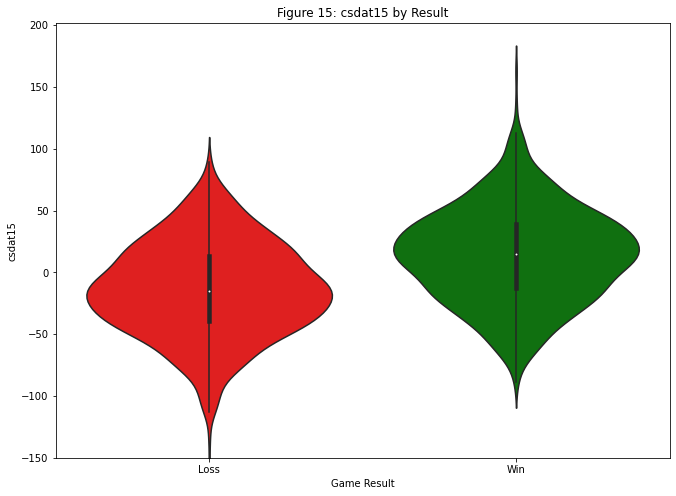

In [45]:
plot("csdat10",14,-80)
plot("csdat15",15,-150)

## The following is mostly a curiosity to examine the differences between regions at the time of the 2019 world championship

In [81]:
### create dataframe containing the league in which each game was played so we can graph them
leagues = []
for i,col in enumerate(data):
    if(i<5):
        leagues.append(col)
print(leagues)
leagueIdx = pd.DataFrame(np.zeros((len(data),1)))
for i,val in enumerate(leagueIdx.values):
    for j in range(len(leagues)):
        if(data[str(leagues[j])][i] == 1.0):
            leagueIdx[0][i] = leagues[j]
leagueIdxData = pd.concat([leagueIdx,data],axis=1).rename(columns={0:"league"})
leagueIdxData.head()

['league_CBLoL', 'league_LCK', 'league_LCS', 'league_LEC', 'league_LMS']


league  league_CBLoL  league_LCK  league_LCS  league_LEC  league_LMS  \
0  league_LCS           0.0         0.0         1.0         0.0         0.0   
1  league_LCS           0.0         0.0         1.0         0.0         0.0   
2  league_LCS           0.0         0.0         1.0         0.0         0.0   
3  league_LCS           0.0         0.0         1.0         0.0         0.0   
4  league_LCS           0.0         0.0         1.0         0.0         0.0   

   gamelength  result     k     d     a   fb       kpm      okpm      ckpm  \
0   35.500000     1.0  21.0  14.0  52.0  0.0  0.591549  0.394366  0.985915   
1   35.500000     0.0  14.0  21.0  32.0  1.0  0.394366  0.591549  0.985915   
2   29.700000     1.0  11.0   4.0  25.0  1.0  0.370370  0.134680  0.505051   
3   29.700000     0.0   4.0  11.0  10.0  0.0  0.134680  0.370370  0.505051   
4   31.983333     1.0  12.0   3.0  26.0  1.0  0.375195  0.093799  0.468994   

    fd     fdtime  teamdragkills  oppdragkills  elementals  oppelementals  \
0  0.0  12.556633            2.0           2.0         2.0            2.0   
1  1.0  12.556633            2.0           2.0         2.0            2.0   
2  1.0  12.306967            2.0           1.0         2.0            1.0   
3  0.0  12.306967            1.0           2.0         1.0            2.0   
4  0.0  10.158933            3.0           1.0         3.0            1.0   

   firedrakes  waterdrakes  earthdrakes  airdrakes  elders  oppelders  herald  \
0         2.0          0.0          0.0        0.0     0.0        0.0     1.0   
1         1.0          0.0          0.0        1.0     0.0        0.0     0.0   
2         0.0          0.0          1.0        1.0     0.0        0.0     0.0   
3         0.0          1.0          0.0        0.0     0.0        0.0     1.0   
4         1.0          0.0          0.0        2.0     0.0        0.0     0.0   

   heraldtime   ft     fttime  firstmidouter  firsttothreetowers  \
0   13.369417  1.0  15.162683            1.0                 0.0   
1   13.369417  0.0  15.162683            0.0                 1.0   
2   12.377433  1.0  12.791600            1.0                 1.0   
3   12.377433  0.0  12.791600            0.0                 0.0   
4   12.242783  0.0  14.386333            1.0                 1.0   

   teambaronkills  oppbaronkills  dmgtochamps  dmgtochampsperminute  wards  \
0             1.0            0.0      70545.0           1987.183099  109.0   
1             0.0            1.0      71736.0           2020.732394  108.0   
2             1.0            0.0      51538.0           1735.286195   96.0   
3             0.0            1.0      38185.0           1285.690236   93.0   
4             1.0            0.0      49421.0           1545.211047  143.0   

        wpm  wardkills      wcpm  totalgold    earnedgpm  goldspent      gspd  \
0  3.070423       51.0  1.436620    69022.0  1293.464789    65108.0  0.110966   
1  3.042254       37.0  1.042254    61541.0  1082.732394    58263.0 -0.110966   
2  3.232323       44.0  1.481481    59081.0  1330.861953    50910.0  0.135867   
3  3.131313       41.0  1.380471    45794.0   883.488215    44433.0 -0.135867   
4  4.471079       44.0  1.375717    61326.0  1262.351225    54340.0  0.158169   

   monsterkillsownjungle  monsterkillsenemyjungle       cspm  goldat10  \
0                  151.0                     24.0  31.802817   16118.0   
1                  155.0                      4.0  32.985915   15436.0   
2                  102.0                     56.0  35.656566   16270.0   
3                   82.0                      0.0  33.265993   14985.0   
4                  128.0                     18.0  34.299114   16157.0   

   oppgoldat10  gdat10  goldat15  oppgoldat15  gdat15   xpat10  oppxpat10  \
0      15436.0   682.0   24287.0      23616.0   671.0  19260.0    18621.0   
1      16118.0  -682.0   23616.0      24287.0  -671.0  18621.0    19260.0   
2      14985.0  1285.0   27399.0      23026.0  4373.0  19015.0    18226.

In [87]:
resultTitles = leagues
resultIndexs = leagues
colors       = ["b","c","r","g","y"]
resultDict   = dict()
for i, ind in enumerate(resultIndexs):
    resultDict[ind] = resultTitles[i]
resultLabeled = leagueIdxData["league"].replace(resultDict)

def violin_plotLeague(y, title, w, h, ymin=0):
    plt.figure(figsize=(w,h))
    ax = sns.violinplot(x=resultLabeled,y=y,palette=colors,order=resultTitles)
    ax.set(xlabel='League')
    ax.set_ylim(ymin,)
    plt.title(title)
    plt.show()
    
def density_plotLeague(x, title, w, h, ymin=0):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
    fig.set_size_inches(w,h)
    ax_box.set_xlim(ymin,x.max())
    ax_hist.set_xlim(ymin,x.max())
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box,left=True)
    ax_box.set_title(title)
    plt.show()
    
def plotLeague(feature, fig_num, ymin=0, dataset=data):
    density_plotLeague(dataset[feature],f"Figure {fig_num}: {feature} Distribution", 11,8,ymin)
    violin_plotLeague(dataset[feature],f"Figure {fig_num}: {feature} by Result", 11,8,ymin)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


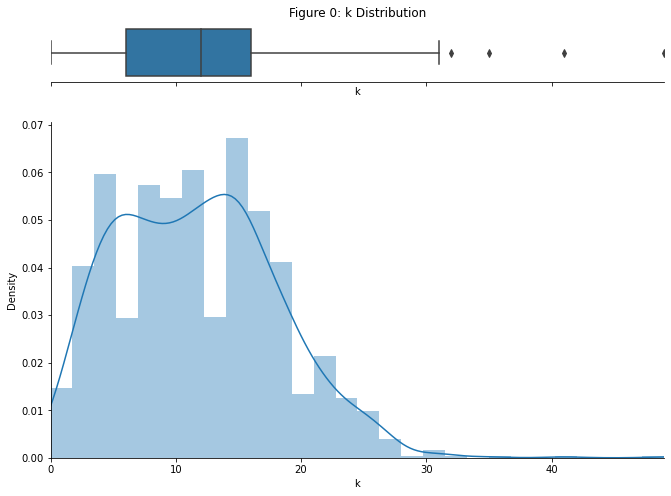

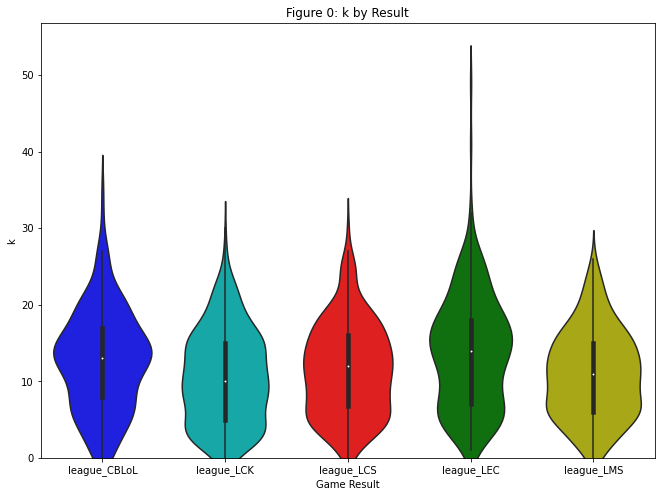

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


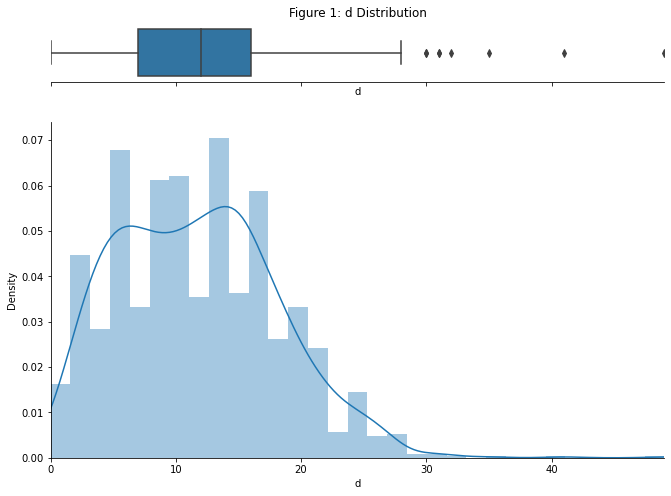

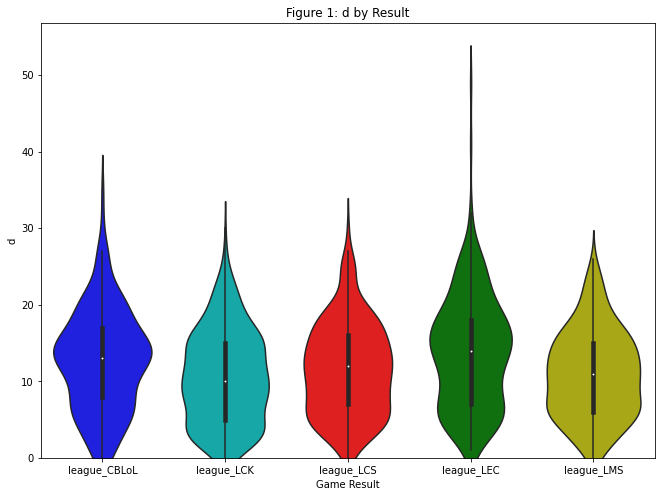

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


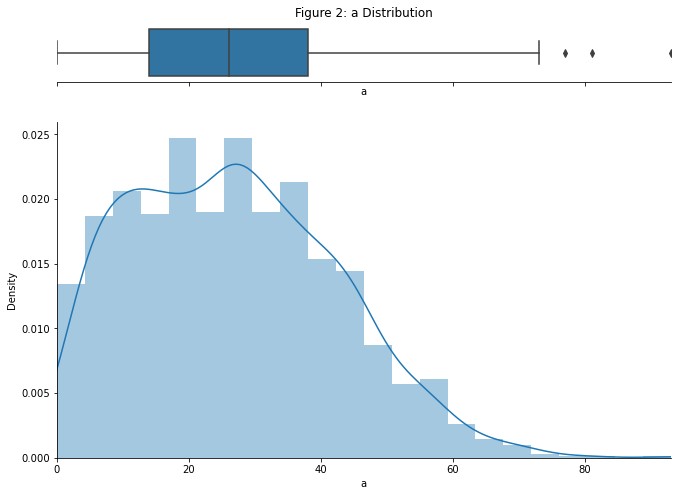

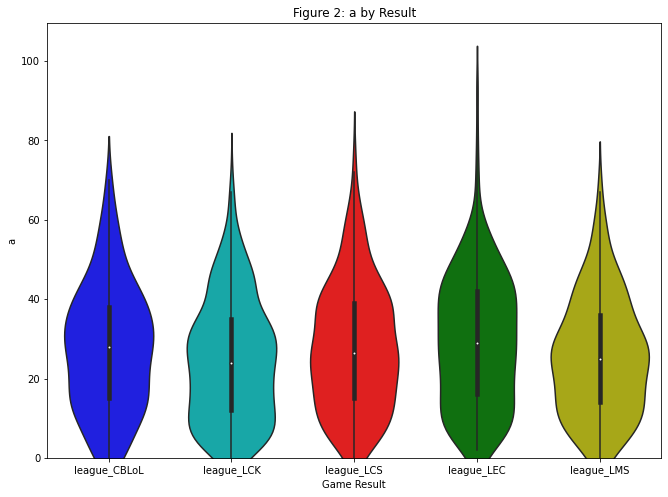

In [88]:
kda = ["k","d","a"]
for i,var in enumerate(kda):
    plot(var,i)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


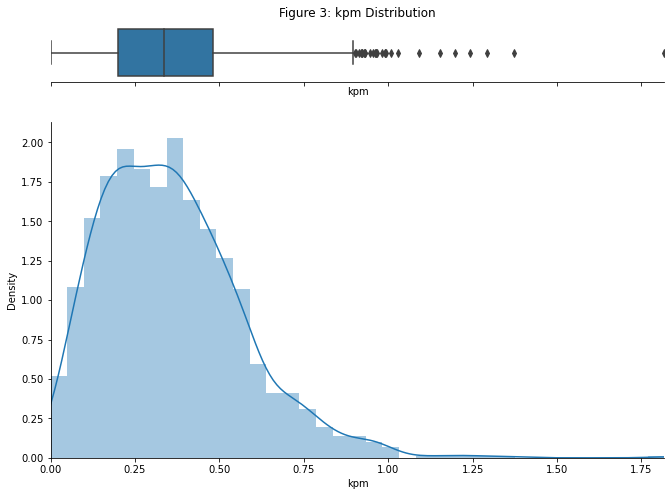

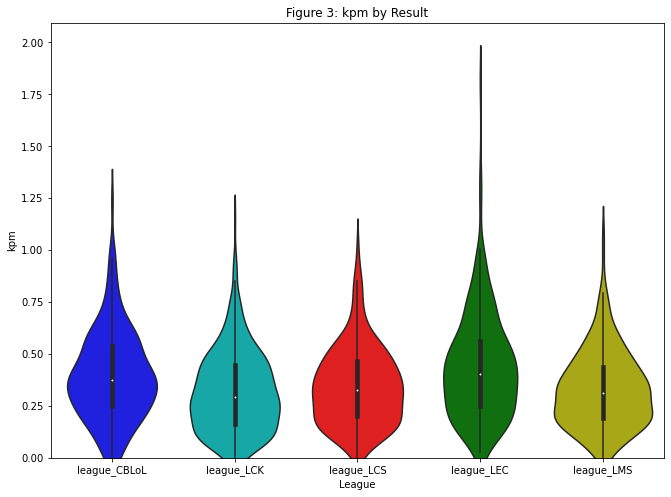

In [89]:
plotLeague("kpm",3)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


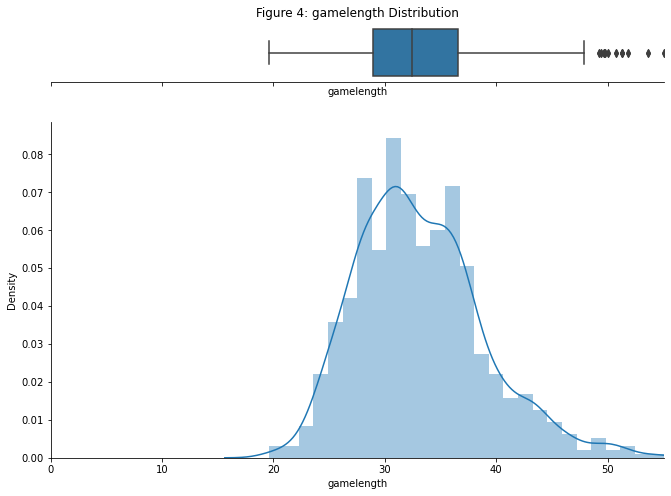

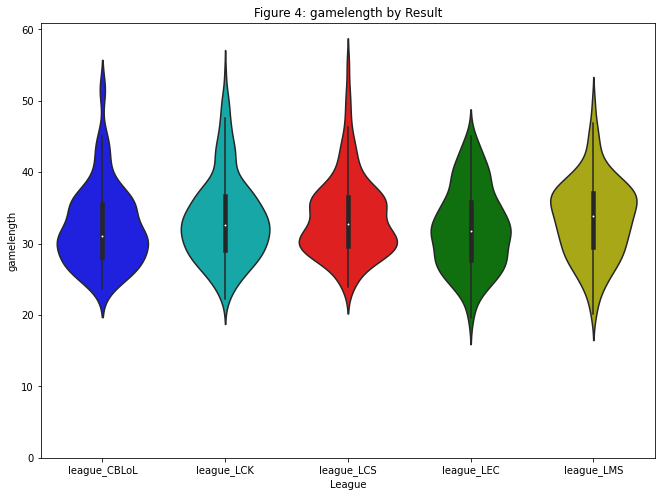

In [101]:
plotLeague("gamelength",4)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


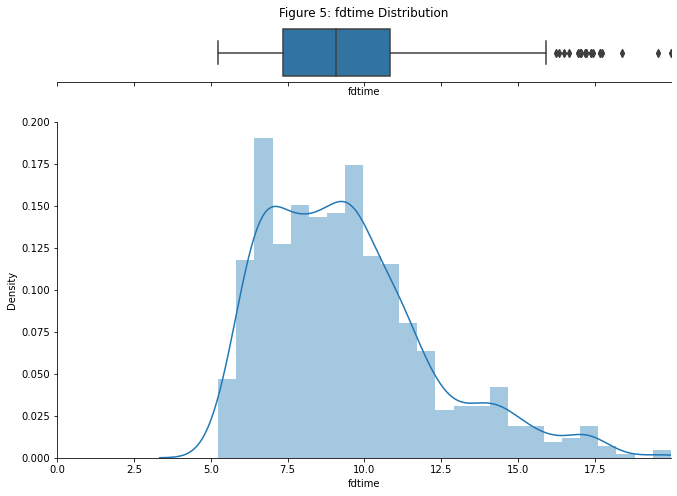

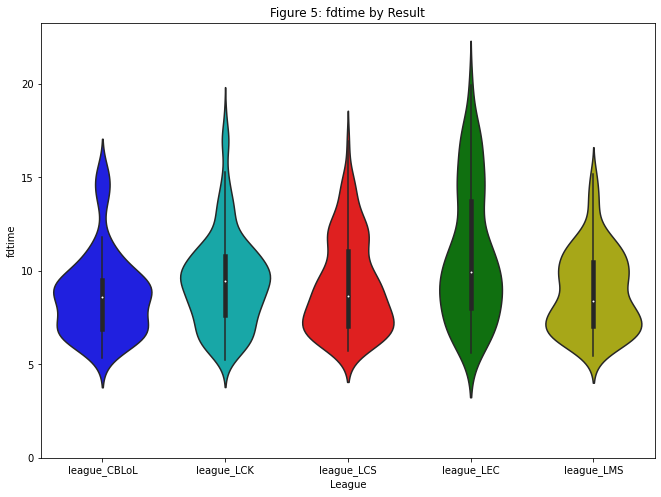

In [102]:
plotLeague("fdtime",5)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


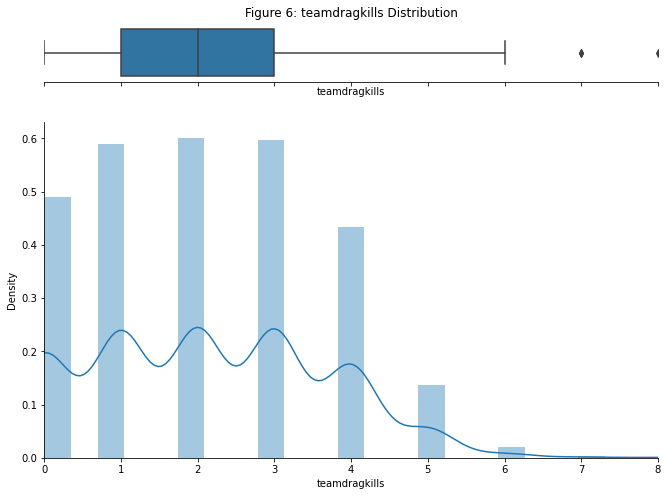

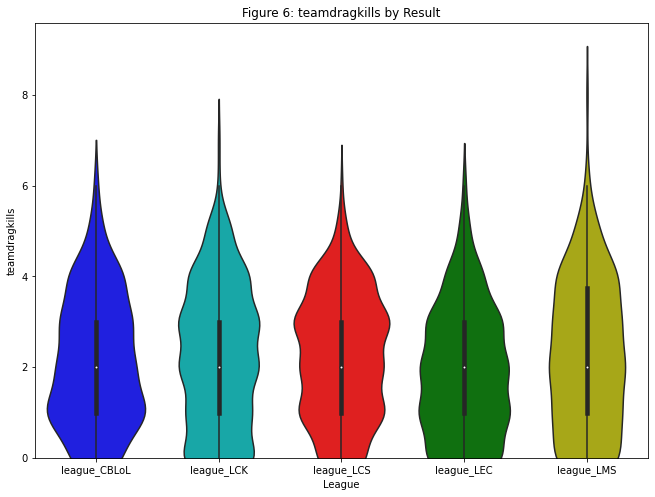

In [103]:
plotLeague("teamdragkills",6)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


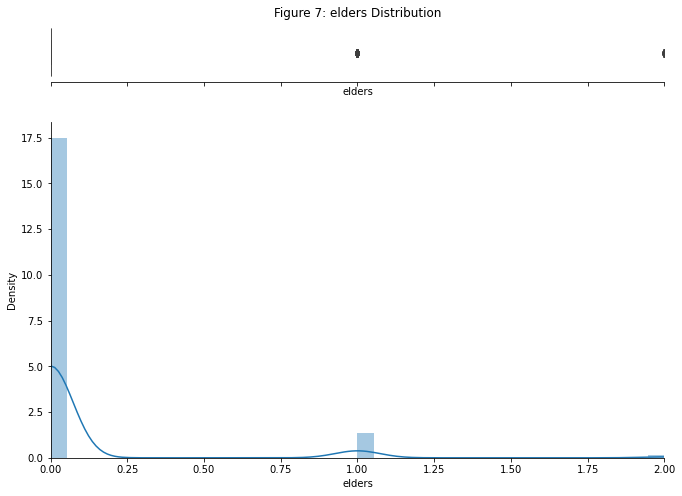

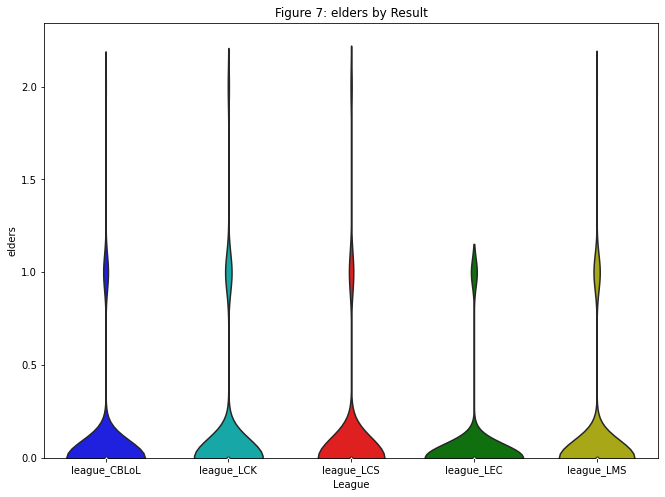

In [104]:
plotLeague("elders",7)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


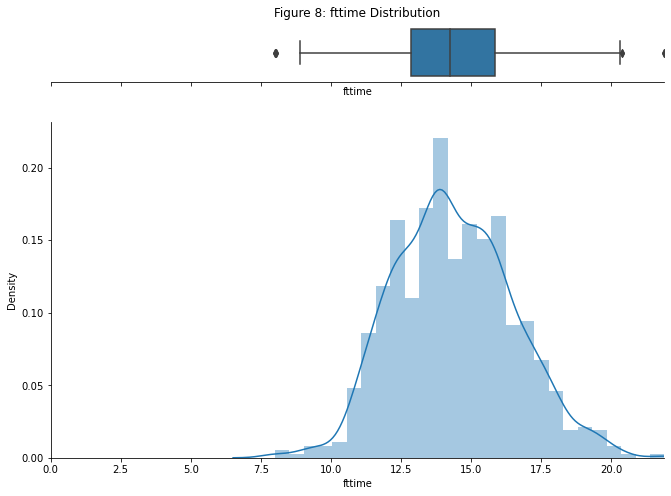

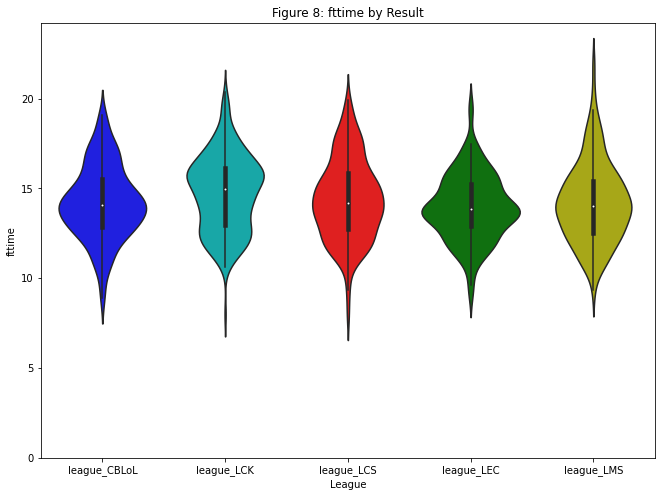

In [105]:
plotLeague("fttime",8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


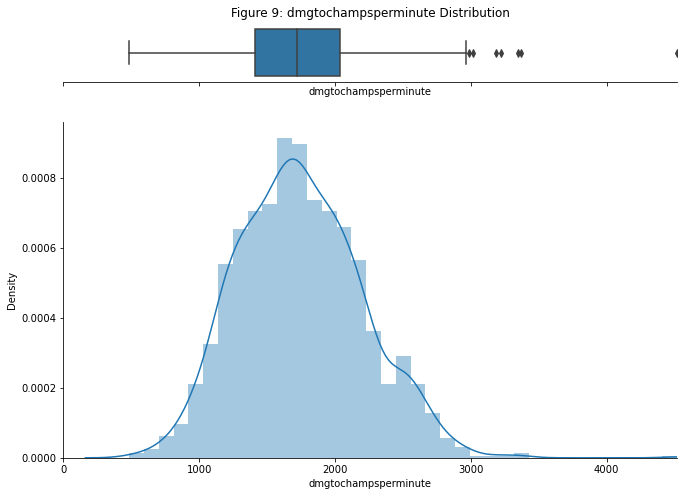

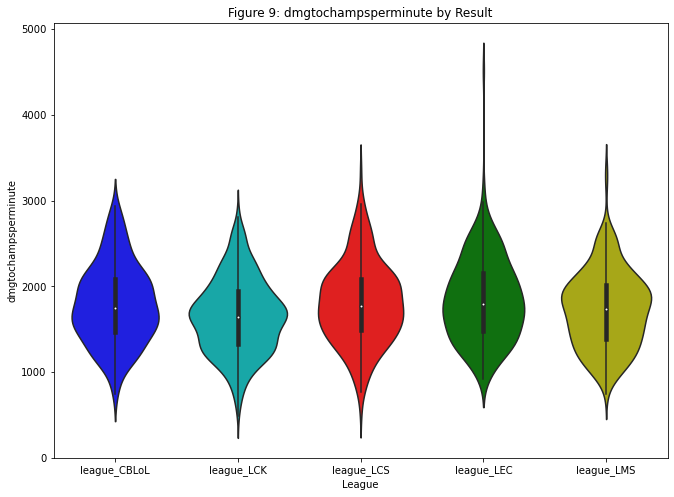

In [106]:
plotLeague("dmgtochampsperminute",9)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


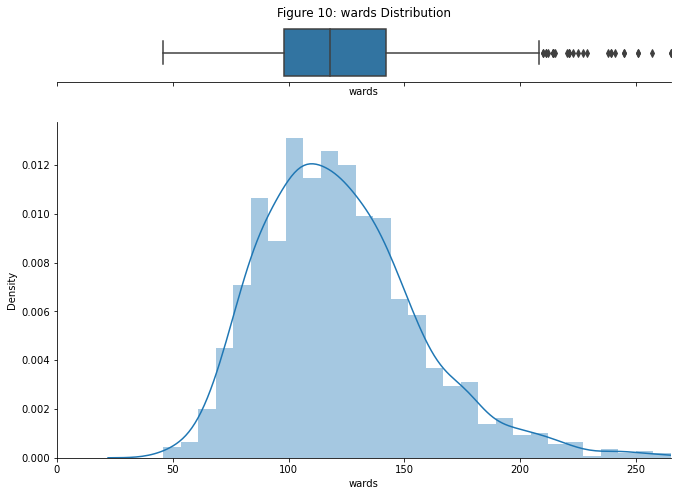

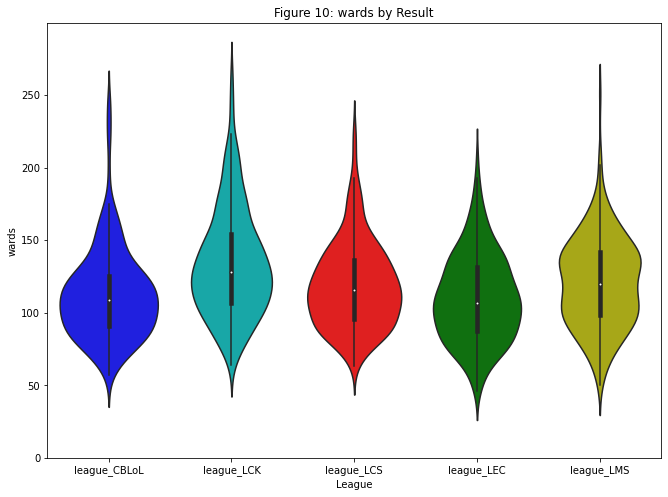

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


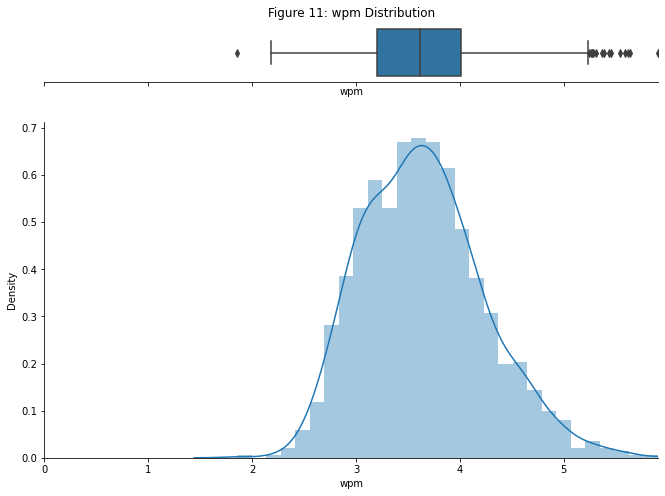

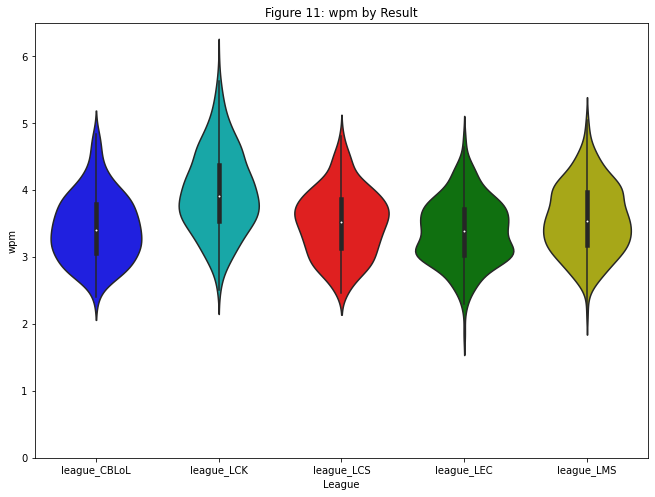

In [107]:
plotLeague("wards",10)
plotLeague("wpm",11)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


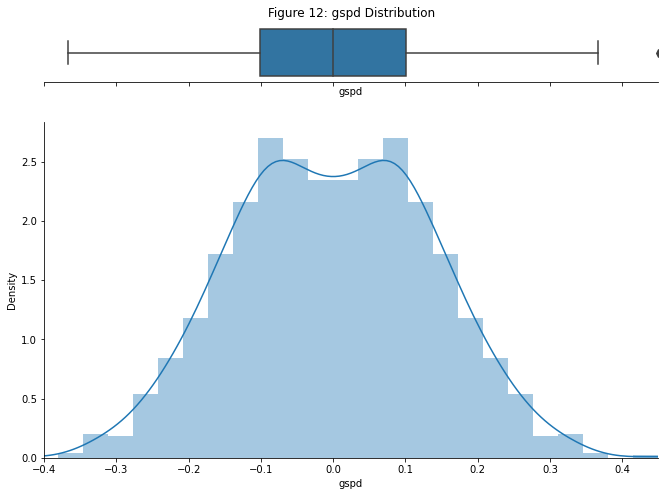

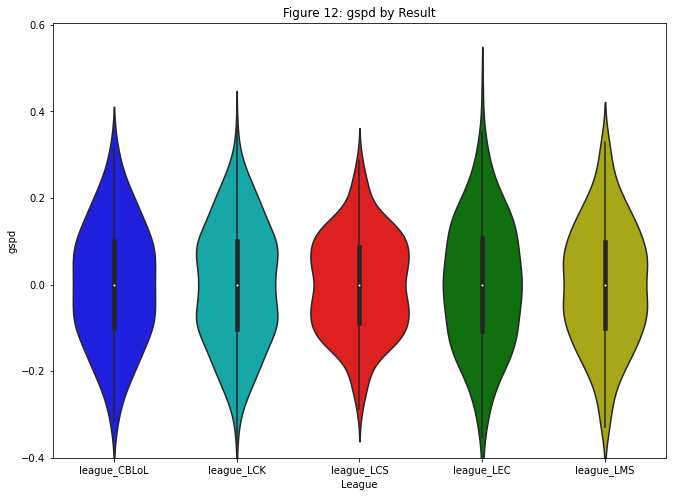

In [108]:
plotLeague("gspd",12,-0.4)

##### From the above several graphs it is apparent that the LEC is the most aggressive region of the 5 listed (it's a shame that the LPL was missing too much data or else they would be an interesting case as they were well-known as being much more aggressive than any other region). LCK is somewhat slower and more controlled, but the five regions aren't vastly different. 

### Further data visualization in sections 3 and 5